In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
d1 = pd.read_csv('../Train_details_22122017.csv')

In [68]:
d1

Train No    Train Name  SEQ Station Code  Station Name Arrival time  \
0            107  SWV-MAO-VLNK    1          SWV  SAWANTWADI R      0.00.00   
1            107  SWV-MAO-VLNK    2         THVM        THIVIM     11.06.00   
2            107  SWV-MAO-VLNK    3         KRMI       KARMALI     11.28.00   
3            107  SWV-MAO-VLNK    4          MAO   MADGOAN JN.     12.10.00   
4            108  VLNK-MAO-SWV    1          MAO   MADGOAN JN.      0.00.00   
...          ...           ...  ...          ...           ...          ...   
186114     99908           EMU    8         AKRD        AKURDI     23.30.00   
186115     99908           EMU    9         DEHR     DEHU ROAD     23.35.00   
186116     99908           EMU   10         BGWI     BEGDAEWAI     23.39.00   
186117     99908           EMU   11         GRWD     GHORAWADI     23.41.00   
186118     99908           EMU   12          TGN      TALEGAON     23.50.00   

       Departure Time  Distance Source Station Source Station Name  \
0            10.25.00         0            SWV     SAWANTWADI ROAD   
1            11.08.00        32            SWV     SAWANTWADI ROAD   
2            11.30.00        49            SWV     SAWANTWADI ROAD   
3             0.00.00        78            SWV     SAWANTWADI ROAD   
4            20.30.00         0            MAO         MADGOAN JN.   
...               ...       ...            ...                 ...   
186114       23.31.00        19           PUNE            PUNE JN.   
186115       23.36.00        24           PUNE            PUNE JN.   
186116       23.40.00        28           PUNE            PUNE JN.   
186117       23.42.00        31           PUNE            PUNE JN.   
186118        0.00.00        34           PUNE            PUNE JN.   

       Destination Station Destination Station Name  
0                      MAO              MADGOAN JN.  
1                      MAO              MADGOAN JN.  
2                      MAO              MADGOAN JN.  
3                      MAO              MADGOAN JN.  
4                      SWV          SAWANTWADI ROAD  
...                    ...                      ...  
186114                 TGN                 TALEGAON  
186115                 TGN                 TALEGAON  
186116                 TGN                 TALEGAON  
186117                 TGN                 TALEGAON  
186118                 TGN                 TALEGAON  

[186119 rows x 12 columns]

In [30]:
def get_ddist(g):
    l = len(g)
    d = dict()
    for i in range(0,l):
        if g[i] in d.keys():
            d[g[i]] = d[g[i]] + 1
        else:
            d[g[i]] = 1
    return d

In [60]:
def getTime(t1):
    if len(t1) == 8:
        time = (int(t1[0]) * 10 + int(t1[1])) * 3600 + (int(t1[3]) * 10 + int(t1[4])) * 60 + int(t1[6] * 10) + int(t1[7])
    if len(t1) == 7:
        time = (int(t1[0])) * 3600 + (int(t1[2]) * 10 + int(t1[3])) * 60 + int(t1[5] * 10) + int(t1[6])
    return time
i = 0
G = nx.MultiDiGraph()
for i in range(0,len(d1['Train No'])):
    if i < len(d1['Train No']) - 1:
        if d1['SEQ'][i+1] != 1:
            t_no = d1['Train No'][i]
            ed = dict()
            if type(d1['Arrival time'][i+1]) != float and type(d1['Departure Time'][i]) != float: 
                time = getTime(d1['Arrival time'][i+1]) - getTime(d1['Departure Time'][i])
            if type(d1['Distance'][i+1]) != float and type(d1['Distance'][i]) != float:
                distance = int(d1['Distance'][i+1]) - int(d1['Distance'][i])
            ed['tno'] = t_no
            ed['time'] = time
            ed['distance'] = distance
            e_weights = [t_no,time,distance]
            G.add_edge(d1['Station Code'][i],d1['Station Code'][i+1],weights = e_weights)

KeyboardInterrupt: 

In [62]:
nodes = list(G.nodes())
print("S1  S2  tno  time  distance")
for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
        if G.has_edge(nodes[i],nodes[j]):
            keys = G.get_edge_data(nodes[i],nodes[j]).keys()
            for k in keys:
                v = G.get_edge_data(nodes[i],nodes[j])[k]
                print(str(nodes[i]) + " " + str(nodes[j]) + " " + str(v['tno']) + " " +str( v['time']) + " " +str( v['distance']))

S1  S2  tno  time  distance
SWV THVM 107 2460 32
SWV THVM 1196 1920 32
SWV THVM 11085 3000 33
SWV THVM 12742 1920 32
SWV KRMI 12201 2280 50
SWV MAO 12432 5040 79
SWV MAO 16335 7980 78
SWV MAO 22150 6300 78
SWV KUDL 128 1200 21
SWV KUDL 1038 3120 20
SWV KUDL 1122 1080 21
SWV KUDL 10104 1260 21
SWV KUDL 10112 1920 21
SWV KUDL 11004 1200 20
SWV KKW 11086 2880 49
SWV KKW 22149 2520 49
SWV RN 12202 7080 160
SWV RN 12431 7980 160
SWV RN 12741 9360 160
SWV RN 16336 11880 160
SWV PERN 10103 1500 22
SWV PERN 10111 1740 22
SWV ZARP 50102 660 11
SWV ZARP 50106 540 10
SWV MADR 50101 780 8
SWV MADR 50107 600 7
THVM KRMI 107 1200 17
THVM KRMI 1045 1440 18
THVM KRMI 1119 3240 18
THVM KRMI 1196 6000 18
THVM KRMI 10103 1080 17
THVM KRMI 10111 1200 17
THVM KRMI 11085 1200 17
THVM KRMI 12450 2160 18
THVM KRMI 16345 1200 17
THVM KRMI 50101 1140 17
THVM KRMI 50107 1200 17
THVM KRMI 70101 1140 18
THVM KRMI 70103 1020 18
THVM MAO 1301 4440 46
THVM MAO 4420 8040 46
THVM MAO 12051 3660 46
THVM MAO 12618 3120 4

KKDE UMB 502 4800 42
KKDE UMB 11077 5520 42
KKDE UMB 12005 2880 42
KKDE UMB 12011 2940 42
KKDE UMB 12057 4440 42
KKDE UMB 12311 5580 41
KKDE UMB 12459 3240 42
KKDE UMB 12497 4080 42
KKDE UMB 12715 4020 41
KKDE UMB 12919 4320 41
KKDE UMB 12925 4800 42
KKDE UMB 12983 3480 42
KKDE UMB 14033 -82260 42
KKDE UMB 14553 4740 42
KKDE UMB 14649 3900 42
KKDE UMB 14673 3900 41
KKDE UMB 14715 4320 42
KKDE UMB 14717 4200 41
KKDE UMB 14731 3660 42
KKDE UMB 15707 4500 42
KKDE UMB 19717 4800 41
KKDE UMB 19805 5220 41
KKDE UMB 22429 2700 42
KKDE NDLS 12006 7740 157
KKDE TRR 11078 1080 21
KKDE TRR 14732 1020 21
KKDE NLKR 11058 900 17
KKDE NLKR 14096 900 17
KKDE SHDM 11057 1560 22
KKDE SHDM 14095 840 22
KKDE SHDM 14217 1500 22
KKDE SHDM 18101 2160 22
KKDE KLE 19718 2940 49
KKDE TNDE 54037 540 3
KKDE TNDE 54039 540 3
KKDE TNDE 54041 420 3
KKDE TNDE 54047 420 3
KKDE TNDE 74014 420 3
KKDE AMIN 64452 480 8
KKDE AMIN 64454 480 8
KKDE AMIN 64462 480 8
KKDE AMIN 64532 420 8
KKDE AMIN 64542 480 8
KKDE DHKR 54303 

JUC BEAS 1707 2280 37
JUC BEAS 11057 2040 36
JUC BEAS 12013 1860 37
JUC BEAS 12029 1860 37
JUC BEAS 12031 1860 37
JUC BEAS 12053 1920 36
JUC BEAS 12203 2580 37
JUC BEAS 12241 2100 36
JUC BEAS 12317 1920 36
JUC BEAS 12379 1920 37
JUC BEAS 12407 1920 37
JUC BEAS 12411 1920 36
JUC BEAS 12421 1920 36
JUC BEAS 12459 1920 37
JUC BEAS 12483 1920 37
JUC BEAS 12497 1920 37
JUC BEAS 12715 1920 36
JUC BEAS 12903 1920 36
JUC BEAS 12925 1920 36
JUC BEAS 13005 2220 37
JUC BEAS 14506 1920 36
JUC BEAS 14603 1920 37
JUC BEAS 14615 2520 36
JUC BEAS 14673 2280 36
JUC BEAS 15209 2100 36
JUC BEAS 15211 1920 36
JUC BEAS 15531 2520 36
JUC BEAS 15707 1980 36
JUC BEAS 15933 2580 36
JUC BEAS 18101 1920 36
JUC BEAS 18103 1920 36
JUC BEAS 18215 1860 36
JUC BEAS 18507 1980 36
JUC BEAS 19225 -84480 37
JUC BEAS 19325 2580 37
JUC BEAS 19415 1980 36
JUC BEAS 19611 1980 37
JUC BEAS 19613 2160 36
JUC BEAS 22423 1920 36
JUC BEAS 22429 1860 36
JUC BEAS 22445 2220 36
JUC JRC 11058 480 5
JUC JRC 12460 480 5
JUC JRC 12904 48

BLS NGRD 58029 660 10
HWH BHP 2515 7200 147
HWH BHP 12041 6540 146
HWH BHP 12507 7080 146
HWH BHP 12509 7380 147
HWH BHP 12513 7380 147
HWH BHP 12515 7380 146
HWH BHP 15227 7080 146
HWH BHP 22501 7080 146
HWH RPH 12503 10320 206
HWH ASN 12249 7800 199
HWH ASN 12323 8580 199
HWH ASN 12327 8940 199
HWH ASN 12331 -77040 199
HWH ASN 12369 8940 199
HWH ASN 12938 -77340 199
HWH DHN 12301 10800 258
HWH JSME 12273 13800 309
HWH BWN 11448 3960 94
HWH BWN 12175 4800 94
HWH BWN 12177 4800 94
HWH BWN 12253 -82260 94
HWH BWN 12303 3900 94
HWH BWN 12305 3660 94
HWH BWN 12307 -82440 94
HWH BWN 12311 4140 94
HWH BWN 12321 4080 94
HWH BWN 12333 3960 94
HWH BWN 12337 4140 94
HWH BWN 12341 4020 94
HWH BWN 12345 4440 94
HWH BWN 12351 3960 94
HWH BWN 12353 3960 94
HWH BWN 12381 3900 94
HWH BWN 13005 3960 94
HWH BWN 13053 8220 106
HWH BWN 13071 4200 94
HWH BWN 15235 4260 94
HWH BWN 15271 4260 94
HWH BWN 22309 -82440 94
HWH BWN 22511 7080 107
HWH BWN 22912 4800 94
HWH DGR 12019 6180 157
HWH DGR 12023 6780 15

STN ULT 3301 300 6
STN ULT 12339 420 5
STN ULT 22387 360 5
STN ULT 53061 360 5
STN ULT 53523 360 6
STN ULT 63541 300 6
STN ULT 63543 300 6
STN ULT 63545 300 6
STN ULT 63551 300 6
STN ULT 63553 300 6
STN CRJ 13007 1020 16
STN RNPR 13021 660 11
STN RNPR 13049 1320 11
STN SLS 53049 300 4
STN SLS 53131 300 4
STN SLS 53139 300 4
STN SLS 63561 360 5
STN SLS 63563 360 5
STN SLS 63567 360 5
STN SLS 63569 360 5
STN SLS 73539 360 4
STN BBI 73538 1740 4
ULT BRR 3301 240 3
ULT BRR 11448 420 3
ULT BRR 12339 360 3
ULT BRR 13151 480 3
ULT BRR 15028 420 3
ULT BRR 22387 300 3
ULT BRR 53061 300 3
ULT BRR 53523 360 3
ULT BRR 63541 240 3
ULT BRR 63543 240 3
ULT BRR 63545 180 3
ULT BRR 63551 240 3
ULT BRR 63553 240 3
ULT CRJ 15027 1740 16
BRR KMME 3301 240 2
BRR KMME 11448 360 3
BRR KMME 12339 360 3
BRR KMME 13151 420 2
BRR KMME 15028 360 3
BRR KMME 22387 240 2
BRR KMME 53061 300 3
BRR KMME 53523 300 2
BRR KMME 63541 240 2
BRR KMME 63543 240 2
BRR KMME 63545 240 2
BRR KMME 63551 240 2
BRR KMME 63553 240 2


TIBI SRKN 4771 480 0
TIBI SJSM 54763 360 2
SRKN HMO 4771 660 11
SRKN HMO 54763 600 10
SRKN SJSM 54764 300 5
PRUR KESR 4773 720 13
PRUR KESR 9761 720 13
PRUR KESR 54759 660 13
PRUR KESR 54761 660 13
KESR DPT 4773 600 11
KESR DPT 54759 600 11
KESR DPT 54761 660 11
KESR SRW 9761 1080 23
KESR SRW 12455 1200 22
DPT SRW 4773 600 12
DPT SRW 54759 540 12
DPT SRW 54761 540 12
SRW ZPR 4773 540 9
SRW ZPR 54759 540 9
SRW ZPR 54761 600 9
SRW GJS 9761 1020 20
SRW GJS 12455 1140 21
ZPR GJS 4773 600 11
ZPR GJS 54759 540 11
ZPR GJS 54761 540 11
GJS RSNR 4773 780 14
GJS RSNR 9761 780 14
GJS RSNR 12455 780 14
GJS RSNR 54759 780 14
GJS RSNR 54761 780 14
RSNR MNGR 4773 720 12
RSNR MNGR 9761 720 12
RSNR MNGR 54759 780 12
RSNR MNGR 54761 720 12
RSNR JES 12455 1560 30
MNGR MSWA 4773 480 8
MNGR MSWA 9761 480 8
MNGR MSWA 54759 540 8
MNGR MSWA 54761 540 8
MSWA BUGY 4773 300 4
MSWA BUGY 54759 300 4
MSWA BUGY 54761 300 4
MSWA JES 9761 540 10
BUGY JES 4773 360 6
BUGY JES 54759 300 6
BUGY JES 54761 300 6
JES SRPR 47

GKP ANDN 5061 4800 41
GKP ANDN 11080 3000 41
GKP ANDN 15063 3000 41
GKP ANDN 15065 3000 41
GKP ANDN 15067 3000 41
GKP ANDN 15069 2640 41
GKP ANDN 18201 4500 41
GKP ANDN 18205 4500 41
GKP SV 12566 5700 119
GKP SV 15622 6900 119
GKP SV 22412 5700 119
GKP CPJ 5066 6600 39
GKP CPJ 12558 2280 39
GKP CPJ 15002 2100 39
GKP CPJ 15212 1980 39
GKP CPJ 15530 2700 39
GKP CPJ 15654 2700 39
GKP CPJ 15656 2700 39
GKP BST 5065 4620 64
GKP BST 12211 4080 64
GKP BST 12529 3900 64
GKP BST 12595 3600 64
GKP BST 15045 4200 64
GKP BST 15097 4020 65
GKP BST 15101 3300 65
GKP BST 15209 3600 64
GKP BST 15211 3600 64
GKP BST 15279 4020 64
GKP BST 15529 3600 64
GKP BST 15531 3900 65
GKP BST 15621 3600 64
GKP BST 15651 4020 64
GKP BST 15653 4020 64
GKP BST 18206 3720 64
GKP MUR 15023 7200 125
GKP MUR 19710 9900 126
GKP GD 12491 9900 153
GKP GD 12523 -76800 153
GKP GD 15015 8400 152
GKP GD 15903 12300 153
GKP GD 19270 -77400 152
GKP SWA 5105 1680 17
GKP SWA 11123 1560 18
GKP SWA 12531 1620 17
GKP SWA 19038 1680 17

RWTB MJBT 5863 600 9
RWTB MJBT 5865 600 9
RWTB MJBT 15613 600 9
RWTB MJBT 15815 900 9
RWTB MJBT 55721 960 9
RWTB MJBT 55861 600 9
RWTB MJBT 55893 600 9
RWTB MJBT 55895 600 9
MJBT HJLI 5863 540 1
MJBT HJLI 5865 540 1
MJBT HJLI 55721 1800 1
MJBT HJLI 55861 540 1
MJBT HJLI 55893 540 1
MJBT HJLI 55895 540 1
MJBT DKJR 15815 960 17
MJBT NMM 15613 1680 30
HJLI DKJR 5863 600 1
HJLI DKJR 5865 600 1
HJLI DKJR 55721 600 1
HJLI DKJR 55861 600 1
HJLI DKJR 55893 600 1
HJLI DKJR 55895 600 1
DKJR BLRE 5863 660 1
DKJR BLRE 5865 480 1
DKJR BLRE 55721 540 1
DKJR BLRE 55861 540 1
DKJR BLRE 55893 660 1
DKJR BLRE 55895 480 1
DKJR NMM 15815 900 13
DKJR RPAN 15617 1800 23
BLRE NMM 5863 540 1
BLRE NMM 5865 480 1
BLRE NMM 55721 480 1
BLRE NMM 55861 660 1
BLRE NMM 55893 540 1
BLRE NMM 55895 480 1
NMM MSMI 5863 360 2
NMM MSMI 5865 360 2
NMM MSMI 55721 360 2
NMM MSMI 55861 840 2
NMM MSMI 55893 360 2
NMM MSMI 55895 360 2
NMM RPAN 15613 -84420 11
NMM RPAN 15815 1680 11
MSMI RPAN 5863 1980 1
MSMI RPAN 5865 1080 1
MSM

CUPJ KJPD 56513 1140 24
CUPJ KJPD 76841 840 24
CUPJ PO 56514 1140 28
CUPJ CQS 56873 240 4
CUPJ CQS 56875 240 4
CUPJ CQS 56877 420 4
MV KMU 6065 2520 31
MV KMU 12083 1380 31
MV KMU 15120 2580 31
MV KMU 16101 1800 31
MV KMU 16105 1680 31
MV KMU 16179 1560 31
MV KMU 16779 1740 31
MV KMU 16861 2280 31
MV KMU 18496 2280 31
MV KMU 22623 1680 31
MV TVR 11017 3300 39
MV TVR 16863 2280 38
MV SY 7062 1080 20
MV SY 11018 1200 20
MV SY 15119 900 20
MV SY 16102 1440 20
MV SY 16106 1140 20
MV SY 16176 1560 20
MV SY 16180 -84960 20
MV SY 16780 -85020 20
MV SY 16862 1140 20
MV SY 18495 1260 20
MV CDM 16864 2280 37
MV CDM 22624 2580 37
MV PEM 16175 1080 15
MV PEM 17407 1020 16
MV PEM 56514 540 15
MV VDL 16184 840 14
MV VDL 16854 840 14
MV VDL 17408 840 14
MV KTM 16183 540 9
MV KTM 16231 600 8
MV KTM 16233 540 8
MV KTM 56821 600 8
MV ADT 16853 1140 20
MV MNX 56033 720 8
MV MNX 56871 540 8
MV MNX 56879 540 8
MV MY 56113 360 4
MV MY 56115 360 4
MV MY 56811 360 4
MV MY 56823 360 4
MV MY 76825 360 4
MV NID 

NVF AJP 6581 480 8
NVF AJP 56273 540 8
NVF AJP 56515 660 8
AJP SHV 6581 600 10
AJP SHV 16577 540 11
AJP SHV 56273 660 10
AJP SHV 56515 720 11
AJP SHV 56909 600 11
AJP SHV 56913 660 11
AJP HSD 12725 1140 21
AJP JRU 17326 2460 50
SHV HSD 6581 540 10
SHV HSD 56273 420 10
SHV HSD 56515 660 10
SHV HSD 56909 600 10
SHV HSD 56913 660 10
SHV JRU 16577 2040 39
HSD ABGT 6581 240 4
HSD ABGT 56273 240 4
HSD ABGT 56515 240 3
HSD RGI 56909 600 10
HSD RGI 56913 660 10
HSD JRU 12725 1740 30
ABGT RGI 6581 360 6
ABGT RGI 56273 600 6
ABGT RGI 56515 420 7
RGI NLNR 6581 420 6
RGI NLNR 56273 180 6
RGI HLK 56515 660 10
RGI HLK 56909 600 10
RGI HLK 56913 660 10
NLNR HLK 6581 300 4
NLNR HLK 56273 420 4
HLK JRU 6581 600 10
HLK JRU 56273 660 10
HLK JRU 56515 2100 10
HLK JRU 56909 2160 10
HLK JRU 56913 720 10
JRU SLU 6581 600 10
JRU SLU 56273 660 10
JRU SLU 56515 540 9
JRU SLU 56517 660 10
JRU SLU 56913 540 9
JRU SLU 56915 480 9
JRU MYK 16577 1140 18
JRU MYK 56911 1140 17
JRU CTA 82651 2760 21
JRU CTA 82653 2760 

PDGM VDK 56769 540 5
KLGD MMDA 6769 540 8
KLGD MMDA 56769 540 9
KLGD VDK 56770 240 2
MMDA MXM 6769 540 11
MMDA MXM 56769 840 10
MXM ANM 56769 240 8
MVRD PPTR 6769 960 10
MVRD PPTR 56769 1020 10
KIK TMPT 6851 360 5
KIK TMPT 6853 420 5
KIK TMPT 76815 240 5
KIK NCR 11018 480 10
KIK NCR 16176 480 10
KIK NCR 16187 480 10
KIK NCR 56513 780 10
KIK NCR 56711 780 10
KIK NCR 76813 780 10
KIK NCR 76851 1080 10
TMPT NCR 6851 780 5
TMPT NCR 6853 900 5
TMPT NCR 76815 840 5
NCR NGT 11018 780 8
NCR NGT 16176 900 8
NCR NGT 16187 900 8
NCR NGT 56513 900 8
NCR NGT 76813 1200 8
NCR VXM 56711 240 5
NCR VXM 76815 420 4
NCR VXM 76851 420 5
NCR VXM 76853 360 4
HBQ KUG 6919 480 9
KUG HBS 6919 480 9
KUG HBS 51412 360 9
KUG HBS 56904 180 9
KUG HBS 56906 240 9
HBS SVHE 6919 420 4
HBS SVHE 51412 180 4
HBS SVHE 56904 240 4
HBS SVHE 56906 240 4
SVHE NVD 6919 360 4
SVHE NGR 16591 1140 12
SVHE NGR 51412 480 12
SVHE NGR 56502 -85920 12
SVHE NGR 56904 1440 12
SVHE NGR 56906 840 12
SVHE NGR 57273 360 12
NVD NGR 6919 600 

CJ TMLP 40705 1800 13
CJ TMLP 40707 1680 13
CJ TMLP 40709 1860 13
CJ TMLP 40711 1980 13
CJ TMLP 40755 1740 13
CJ TMLP 40757 1680 13
CJ TMLP 40901 2700 13
CJ TMLP 56006 1320 13
CJ TMLP 56042 540 13
CJ TMLP 66041 2460 13
CJ PALR 56041 1440 25
CJ WJ 40706 660 14
CJ WJ 40752 900 14
CJ WJ 40802 840 14
CJ WJ 40804 660 14
CJ WJ 56003 780 15
CJ WJ 56005 900 15
CJ WJ 66042 780 14
CJ CJE 40902 60 1
TRT PUT 11028 1680 33
TRT PUT 11042 1680 33
TRT PUT 16003 1680 33
TRT PUT 22606 1680 32
TRT EKM 16053 1080 19
TRT EKM 16057 900 19
TRT EKM 17651 1080 18
TRT EKM 66047 1080 19
TRT NG 16203 780 17
TRT AJJN 43502 780 10
TRT AJJN 43504 780 10
TRT POI 56011 300 8
TRT POI 56042 480 7
TRT POI 66039 480 8
TRT POI 66049 420 8
NDKD VNUP 7134 1200 18
NDKD VNUP 12603 960 17
NDKD VNUP 12733 1080 18
NDKD VNUP 12747 1020 17
NDKD VNUP 17231 1020 18
NDKD VNUP 17255 1260 18
NDKD TMLU 57320 720 11
NDKD TMLU 57651 780 12
NDKD TMLU 77298 660 11
NDKD TMLU 77676 960 12
NDKD GZA 57317 900 11
NDKD GZA 57323 900 11
NDKD GZA 77

UDGR KTKR 57547 660 12
UDGR KTKR 57549 540 12
LTRR PNF 7417 2280 28
LTRR PNF 11011 3540 27
LTRR PRLI 11404 -78600 63
LTRR PRLI 11405 5700 63
LTRR PRLI 17002 6000 63
LTRR PRLI 17206 5700 63
LTRR PRLI 17208 5700 63
LTRR PRLI 17613 7200 63
LTRR PRLI 17622 10500 63
LTRR LUR 7517 5700 33
LTRR LUR 11012 1800 33
LTRR LUR 11076 2400 33
LTRR LUR 11403 1980 32
LTRR LUR 11406 3120 33
LTRR LUR 17014 4020 32
LTRR LUR 17614 2700 33
LTRR LUR 22144 2100 33
LTRR LUR 51425 1800 32
LTRR LUR 51433 2700 33
LTRR JOA 16594 840 11
LTRR WDLN 51426 540 5
LTRR WDLN 51434 540 5
LTRR WDLN 57547 540 5
LTRR WDLN 57549 540 5
LTRR CKX 57548 600 5
LTRR CKX 57550 420 4
PNF PRLI 7417 4800 36
PNF PRLI 11011 -82200 36
PNF PRLI 16594 4800 36
PNF JOA 16593 1140 16
PNF MRTY 51426 540 8
PNF MRTY 51434 540 8
PNF MRTY 57547 540 8
PNF MRTY 57549 540 8
PNF KRPR 51425 300 8
PNF KRPR 51433 480 7
PNF KRPR 57548 360 8
PNF KRPR 57550 420 7
PRLI GNH 7417 1320 29
PRLI GNH 11011 2040 30
PRLI GNH 11404 2040 29
PRLI GNH 16594 2940 30
PRLI G

BTS NMBR 8035 300 4
BTS NMBR 58001 360 5
BTS NMBR 58003 360 4
BTS NMBR 58005 360 4
BTS NMBR 58007 360 4
BTS NMBR 58009 420 4
BTS NMBR 68021 300 4
BTS ROP 18007 1560 10
BTS ROP 18409 720 10
BTS ROP 18645 780 10
NMBR ROP 8035 540 5
NMBR ROP 58001 480 5
NMBR ROP 58003 360 6
NMBR ROP 58005 480 5
NMBR ROP 58007 360 5
NMBR ROP 58009 360 5
NMBR ROP 68021 300 5
ROP HIP 8035 360 7
ROP HIP 12891 360 6
ROP HIP 58001 420 6
ROP HIP 58003 420 6
ROP HIP 58005 540 7
ROP HIP 58007 420 7
ROP HIP 58009 420 7
ROP HIP 68021 420 7
ROP HIP 78012 360 6
ROP HIP 78016 360 6
ROP JRG 18007 900 12
ROP TKH 12892 540 6
ROP TKH 78009 540 6
ROP TKH 78011 360 6
ROP TKH 78013 540 7
ROP TKH 78017 600 7
HIP TKPL 8035 360 7
HIP TKPL 58001 480 7
HIP TKPL 58003 480 7
HIP TKPL 58007 480 7
HIP TKPL 58009 480 7
HIP TKPL 78012 420 7
HIP TKPL 78016 360 7
SHM PDPK 38031 240 2
SHM PDPK 38033 240 2
SHM PDPK 38305 240 2
GUNA RTA 8061 3600 21
GUNA RTA 11102 1500 20
GUNA RTA 11103 1500 21
GUNA RTA 11126 1800 20
GUNA RTA 11701 2100 21
G

MSH PHC 59473 420 8
MSH PHC 59475 360 7
MSH PHC 59477 420 7
MSH PHC 59481 420 7
MSH PHC 59483 420 7
MSH PHC 79433 420 7
MSH PHC 79435 420 7
MSH LCH 59509 660 8
MSH LCH 59511 660 8
PNU ABR 9011 2700 53
PNU ABR 11090 3900 53
PNU ABR 12216 2700 53
PNU ABR 12480 2940 53
PNU ABR 12548 5100 53
PNU ABR 12915 3060 53
PNU ABR 12957 2460 53
PNU ABR 12989 2700 53
PNU ABR 14312 -83220 53
PNU ABR 14322 -83220 53
PNU ABR 14708 3600 53
PNU ABR 15270 2580 53
PNU ABR 16210 2640 53
PNU ABR 16312 2640 53
PNU ABR 16508 2640 53
PNU ABR 16532 2640 53
PNU ABR 16587 2580 53
PNU ABR 17037 3120 53
PNU ABR 17623 3600 53
PNU ABR 18421 3420 53
PNU ABR 19027 2700 53
PNU ABR 19031 2580 53
PNU ABR 19055 3600 53
PNU ABR 19223 3120 53
PNU ABR 19263 4800 53
PNU ABR 19269 4800 53
PNU ABR 19401 3420 53
PNU ABR 19403 3000 53
PNU ABR 19407 3840 53
PNU ABR 19409 3420 53
PNU ABR 19411 2820 53
PNU ABR 19413 3000 53
PNU ABR 19415 2700 53
PNU ABR 19565 2580 53
PNU ABR 19573 3600 53
PNU ABR 19579 2580 53
PNU ABR 19707 3120 53
PNU

BAB TBT 18478 1320 24
BAB TBT 19166 1260 25
BAB TBT 19168 1260 25
BAB BZY 11058 840 12
BAB BZY 18238 960 12
BAB BPW 51812 360 4
BAB BPW 51818 360 4
BAB BPW 51828 420 4
BAB KHJ 51811 540 8
BAB KHJ 51817 480 8
BAB KHJ 51827 480 8
CGN AIT 11015 2580 57
CGN MOTH 11109 1080 24
CGN MOTH 11124 1140 24
CGN MOTH 19165 1260 23
CGN MOTH 19167 1260 23
CGN PTSC 51804 480 7
CGN PTSC 51814 480 7
CGN NDK 51803 780 12
CGN NDK 51813 660 12
AIT ORAI 11015 1980 25
AIT ORAI 11109 1320 25
AIT ORAI 11124 1500 24
AIT ORAI 19165 1800 25
AIT ORAI 19167 1800 25
AIT MOTH 11110 1740 34
AIT MOTH 11123 1800 34
AIT MOTH 19166 1380 34
AIT MOTH 19168 1380 34
AIT PRN 51804 480 11
AIT PRN 51814 720 11
AIT BHUA 51803 900 14
AIT BHUA 51813 780 14
AIT KNH 51861 2100 13
AIT KNH 51863 2100 13
AIT KNH 51865 2100 13
AIT KNH 51867 2100 13
AIT KNH 51869 2100 13
ORAI KPI 11015 1680 33
ORAI KPI 11109 1380 34
ORAI KPI 11124 1380 34
ORAI KPI 19165 1380 33
ORAI KPI 19167 1380 33
ORAI PHN 12512 1800 47
ORAI PHN 12522 1800 48
ORAI PHN 1

KDG YT 71416 720 13
KDG KTT 51350 300 6
KDG KTT 51402 300 6
KDG KTT 51422 360 7
KDG KTT 51452 360 7
KDG KTT 71402 300 7
KDG KTT 71404 360 7
KDG KTT 71408 300 6
KDG KTT 71410 300 6
KDG KTT 71414 360 7
KDG KDTN 51347 240 5
KDG KDTN 51401 300 5
KDG KDTN 51421 360 5
KDG KDTN 51451 300 5
KDG KDTN 71403 300 5
KDG KDTN 71407 240 5
KDG KDTN 71409 240 5
KDG KDTN 71411 240 5
KDG KDTN 71413 -86100 5
KDG KDTN 71415 240 5
YL ANK 51401 1080 15
YL ANK 51421 780 15
BDWD VNA 11040 840 19
BDWD VNA 12140 960 18
BDWD VNA 19026 780 18
BDWD ACG 51184 540 12
BDWD ACG 51198 480 12
BDWD ACG 51286 1140 12
BDWD KLHD 51183 360 5
BDWD KLHD 51197 360 5
BDWD KLHD 51285 360 5
NN JM 11039 660 12
NN JM 12139 -84720 12
NN JM 12809 480 12
NN JM 12833 480 12
NN JM 18029 1080 12
NN JM 19025 480 13
NN JM 51183 660 12
NN JM 51197 720 12
NN JM 51285 660 12
NN KJL 51184 240 8
NN KJL 51198 360 8
NN KJL 51286 540 8
CND MLR 51198 840 13
CND MLR 51262 840 13
CND MLR 51286 840 14
SEGM TGP 11039 960 22
SEGM SNI 12139 1260 30
SEGM SN

NLKR AMIN 54303 540 9
NLKR AMIN 64461 480 8
NLKR AMIN 64465 480 9
NLKR AMIN 64481 540 8
NLKR AMIN 64541 540 8
NLKR AMIN 64543 540 8
SHDM DHMZ 64482 360 6
SHDM DHMZ 64532 360 6
SHDM DHMZ 64542 360 6
SHDM DHMZ 64546 300 6
SHDM DHMZ 64548 360 6
SHDM DHMZ 74994 360 6
SHDM MOY 54303 720 10
SHDM MOY 64481 540 10
SHDM MOY 64483 420 10
SHDM MOY 64541 480 10
SHDM MOY 64543 540 10
SHDM MOY 64545 480 10
SHDM MOY 64547 540 10
SHDM MOY 74993 480 10
UBC SIR 12925 1980 46
UBC SMU 54551 540 10
UBC SMU 54553 540 10
UBC SMU 54557 600 10
UBC SMU 54757 720 10
UBC SMU 64511 480 10
UBC SMU 64513 540 10
UBC SMU 64515 540 10
UBC SMU 64517 540 10
UBC SMU 64521 480 10
UBC SMU 64523 480 10
UBC SMU 74645 420 10
NBA DBN 54552 720 13
NBA DBN 54556 840 13
NBA DBN 54758 1200 13
NBA KKRL 54551 420 6
NBA KKRL 54553 360 6
NBA KKRL 54757 360 6
MET AHH 11057 2520 19
MET AHH 16031 1080 19
MET AHH 16317 1080 19
MET QRP 16687 2280 28
MET HMI 54054 480 7
MET HMI 54602 660 7
MET HMI 54604 480 7
MET HMI 54606 960 7
MET HMI 5463

CAR KEI 11093 4980 38
CAR KEI 19045 6960 38
CAR RBGJ 12874 4980 76
CAR RBGJ 18102 4980 76
CAR ARW 13202 1260 19
CAR KYT 63238 540 10
CAR KYT 64596 660 10
CAR SKGH 13345 1440 21
CAR SKGH 14370 1680 21
CAR SKGH 24370 1680 21
CAR SKGH 53346 1680 21
CAR SKGH 53352 1380 20
CAR DAP 53345 360 7
CAR DAP 54103 420 7
CAR DAP 63237 480 7
CAR DAP 64595 780 7
KEI VYN 53526 720 5
KEI VYN 54110 780 5
KEI VYN 54268 600 5
KEI VYN 54270 540 5
KEI VYN 63226 660 5
KEI VYN 63554 780 5
CLR QLM 11097 5100 26
CLR QLM 12780 5100 26
CLR QLM 17309 5700 27
CLR QLM 17311 5640 26
CLR QLM 17316 5940 26
CLR QLM 18047 5100 26
CLR QLM 82665 780 26
CLR CRZ 17419 1380 8
CLR TGT 51406 840 12
QLM SVM 11097 1680 19
QLM SVM 12780 1380 18
QLM SVM 17309 1440 18
QLM SVM 17311 1680 19
QLM SVM 17316 1440 18
QLM SVM 17419 1380 18
QLM SVM 18047 1080 19
QLM SVM 82665 600 19
QLM KM 56961 540 8
QLM KM 56963 540 8
QLM KM 56965 480 8
SVM KM 56962 600 10
SVM KM 56964 780 10
SVM KM 56966 780 10
SVM CNR 56961 540 7
SVM CNR 56963 240 7
SVM 

BJRI BRH 11265 3180 51
BJRI BATL 18242 420 6
BJRI BATL 51606 300 6
BJRI BATL 51754 300 6
BJRI BATL 51755 300 6
BJRI BATL 58220 360 6
BJRI BATL 58221 360 6
BJRI BATL 58224 300 6
BJRI BATL 58702 360 6
BJRI BATL 68750 360 6
BJRI BRND 18241 780 10
BJRI BRND 51605 720 10
BJRI BRND 51753 720 10
BJRI BRND 51756 780 10
BJRI BRND 58219 720 10
BJRI BRND 58222 780 10
BJRI BRND 58223 720 10
BJRI BRND 58227 720 10
BJRI BRND 58701 780 10
BJRI BRND 68749 720 10
BRH KTO 11265 840 17
BRH KTO 18241 840 17
BRH KTO 58223 960 17
BRH KTO 58701 1020 17
BRH KTO 68749 1080 17
BRH NGE 18242 600 8
BRH NGE 58224 720 8
BRH NGE 58702 780 8
BRH NGE 68750 540 8
KTO BSPR 11265 3360 39
KTO SPDR 18241 660 10
KTO SPDR 58223 540 10
KTO SPDR 58701 600 10
KTO SPDR 68749 600 10
BSPR ABKP 11265 3000 19
BSPR KJZ 18242 960 13
BSPR KJZ 58224 480 13
BSPR KJZ 58702 660 13
BSPR KJZ 68750 780 13
BSPR KLPG 18241 480 10
BSPR KLPG 58223 480 10
BSPR KLPG 58701 480 10
BSPR KLPG 68749 540 10
ABKP KLPG 18242 540 8
ABKP KLPG 58224 420 8
ABK

PRB JBX 19304 540 8
PRB JBX 59320 540 8
PRB JBX 59394 540 8
PRB BKTL 59319 480 6
PRB BKTL 59393 480 6
MFQ VST 11651 780 19
MFQ DMYA 51675 660 8
MFQ DMYA 51679 480 8
VST DMYA 51676 1260 10
VST DMYA 51680 480 10
VST CTJ 51675 1080 19
VST BBAR 51679 480 11
NWB SKBR 51676 540 8
NWB SKBR 51680 480 8
NWB BSDL 51675 480 9
NWB BSDL 51679 1080 9
MNV ASKN 11701 3600 45
MNV ASKN 12181 2280 45
MNV ASKN 12197 2160 46
MNV ASKN 14310 2520 46
MNV ASKN 14710 2100 46
MNV ASKN 15045 2520 46
MNV ASKN 18009 2760 46
MNV ASKN 19607 2760 45
MNV PIA 19166 1080 19
MNV PIA 19168 1080 20
MNV KXB 51608 960 8
MNV KXB 51610 540 8
MNV KXB 51611 540 8
MNV KXB 51884 420 8
MNV KXB 59341 540 8
MNV GVB 51607 600 8
MNV GVB 51609 540 8
MNV GVB 51612 480 8
MNV GVB 51883 720 8
MNV GVB 59342 540 8
ASKN PIA 19165 1260 26
ASKN PIA 19167 1260 26
ASKN HPKA 51608 420 8
ASKN HPKA 51610 480 8
ASKN HPKA 51611 540 9
ASKN HPKA 51884 480 9
ASKN HPKA 59341 540 8
ASKN RIKA 51607 540 7
ASKN RIKA 51609 540 7
ASKN RIKA 51612 420 7
ASKN RIKA 5

MRHT MOX 55910 600 5
MRHT KOWN 55909 720 12
DBRG DBRT 55909 1200 8
DBRG NTSK 12526 3000 41
DBRG NTSK 14055 -83400 41
DBRG NTSK 15903 3300 41
DBRG NTSK 15906 -82980 41
DBRG NTSK 15909 3300 41
DBRG NTSK 15930 -82800 41
DBRG NTSK 15933 3300 41
DBRG NTSK 15942 3300 41
DBRG NTSK 15960 3900 41
DBRG NTSK 22501 4500 42
DBRG DMGN 15928 720 13
DBRG DMGN 55910 720 13
DBRG CHB 15927 1800 24
DBRG CHB 15968 1500 24
NHLN GMTO 15618 780 9
NR KBSN 51154 540 6
NR KBSN 51182 240 6
NR KBSN 51424 480 6
NR UGN 51153 480 7
NR UGN 51181 360 7
NR UGN 51423 420 7
BRJN BPH 12834 480 9
BRJN BPH 18030 480 9
BRJN BPH 18477 480 9
BRJN BPH 18507 480 9
BRJN BPH 58111 420 9
BRJN BPH 58113 420 9
BRJN BPH 58117 420 10
BRJN BPH 58213 420 9
BRJN IB 58112 780 3
BRJN IB 58114 420 3
BRJN IB 58118 420 2
BRJN IB 58214 540 3
BYNR ANKL 16334 5400 98
BYNR BIJR 56641 660 8
BYNR BIJR 56666 300 8
BYNR BIJR 70105 540 8
BYNR SHMI 56640 540 8
BYNR SHMI 70106 720 8
SL MAQ 12619 3960 26
SL MAQ 16524 3480 25
SL MAQ 22635 4080 26
SL TOK 566

KMNC THMR 59705 480 5
HZD PSB 13009 1020 22
HZD PSB 13151 1020 22
HZD PSB 13329 1020 22
HZD PSB 18626 1020 22
HZD CCK 13306 540 10
HZD CBH 13305 600 10
HZD GRBH 63550 360 5
HZD GRBH 63554 180 5
HZD KSHR 63549 180 5
HZD KSHR 63553 540 5
HRS MXK 12875 840 16
HRS JLS 15484 960 20
HRS JLS 18102 960 20
HRS PORA 54462 480 10
HRS PORA 64154 420 10
HRS PORA 64584 420 10
HRS SNS 54461 720 9
HRS SNS 64165 480 9
HRS SNS 64581 420 8
HRS SNS 64583 540 9
HRS HRF 64582 1200 5
HRS HRF 64586 1500 5
KRJ KJY 14163 480 7
KRJ KJY 54401 480 6
KRJ KJY 54403 480 6
KRJ KJY 54405 480 6
KRJ BSC 22431 1680 23
KRJ CHL 18101 660 15
KRJ KAMP 64102 300 6
KRJ KAMP 64110 300 6
KRJ KAMP 64114 300 6
KRJ KAMP 64152 300 6
KRJ KAMP 64167 300 6
KRJ KAMP 64582 360 6
KRJ KAMP 64584 720 6
KRJ SKQ 64101 300 5
KRJ SKQ 64103 240 5
KRJ SKQ 64105 240 5
KRJ SKQ 64111 360 5
KRJ SKQ 64113 300 5
KRJ SKQ 64151 240 5
KRJ SKQ 64168 300 5
KRJ SKQ 64581 300 6
KRJ SKQ 64583 660 5
PAN MNAE 12340 600 10
PAN MNAE 13050 720 11
PAN MNAE 22388 540 

ABS CWDA 14602 1080 15
ABS CWDA 54559 1020 15
ABS PKK 54703 1020 14
ABS PKK 54752 780 15
ABS BFE 54560 360 8
ABS BFE 54754 720 8
ABS BFE 54756 900 8
ABS BFE 54758 600 8
ABS PJK 54751 -85680 14
ABS KLWL 54753 1080 8
ABS KLWL 54755 720 8
ABS KLWL 54757 660 8
LKS LGH 12455 3900 76
LKS LGH 15909 5760 76
LKS LGH 19224 3600 76
LKS LGH 22982 3600 76
LKS MHJ 14888 1980 40
LKS MHJ 22981 1800 39
LKS DHRR 14887 1140 22
LKS NTZ 54702 600 11
LKS NTZ 54704 600 11
LKS NTZ 59706 840 11
LKS DLC 54701 780 13
LKS DLC 54703 720 13
LKS DLC 59705 720 13
LGH KLYT 12468 -84360 47
LGH NAL 14704 600 11
LGH MHJ 19107 4860 115
LGH DHRR 14888 2520 54
LGH KNSR 54702 780 12
LGH KNSR 54704 780 12
LGH KNSR 59706 840 12
PM BWSN 12461 420 7
PM SMDP 51915 240 4
PM SMDP 54011 300 3
PM SMDP 54085 360 4
PM SMDP 54309 300 4
PM SMDP 54412 360 4
PM SMDP 54413 360 4
PM SMDP 54417 300 4
PM SMDP 54421 360 4
PM SMDP 74001 300 4
PM SMDP 74003 300 4
PM SMDP 74033 300 3
PM SMDP 74037 300 3
BWSN SMDP 51916 300 3
BWSN SMDP 54012 300 3


PDKT KKDI 12605 3600 37
PDKT KKDI 15120 5640 37
PDKT KKDI 16861 4620 37
PDKT KKDI 18496 3780 36
PDKT KKDI 22661 -84000 37
PDKT CTND 16101 1260 24
PDKT CTND 16181 1140 25
PDKT CTND 16618 1680 25
PDKT VEL 56830 660 11
PDKT VEL 76808 660 12
PDKT VEL 76830 660 12
PDKT VEL 76840 660 12
PDKT NMN 56829 360 6
PDKT NMN 76831 360 6
PDKT NMN 76839 360 6
PDKT TYM 76807 840 16
KKDI DKO 15120 360 5
KKDI DKO 16101 360 5
KKDI DKO 16181 360 5
KKDI DKO 16618 300 5
KKDI DKO 16861 300 4
KKDI DKO 18496 300 5
KKDI DKO 22661 300 5
KKDI DKO 56829 300 5
KKDI DKO 76807 360 5
KKDI DKO 76837 360 4
KKDI CTND 16102 900 12
KKDI CTND 16182 780 12
KKDI CTND 16617 840 12
KKDI KTYR 56830 420 7
KKDI KTYR 76808 420 6
KKDI KTYR 76830 420 6
KKDI KTYR 76840 420 6
AB GYM 12610 1380 28
AB GYM 22650 1380 28
AB MPI 16086 540 12
AB MPI 16090 600 12
AB PCKM 56262 300 5
AB PCKM 66020 420 6
AB VGM 56261 540 8
AB VGM 66019 540 8
SHU AVN 16022 480 10
SHU AVN 16086 540 9
SHU AVN 16090 480 9
SHU TUG 16085 240 4
SHU TUG 56007 240 4
SHU T

UR FM 17024 1140 13
UR FM 17028 1740 13
UR BDVL 57306 420 6
UR BDVL 57326 360 6
UR BDVL 57426 540 6
UR BDVL 57436 540 7
UR BDVL 57448 420 6
UR BDVL 57456 480 6
UR BDVL 77640 480 6
UR BDVL 77641 360 6
UR BDVL 77642 480 6
UR BDVL 77643 480 6
UR BDVL 77645 360 6
UR BDVL 77647 540 6
UR BDVL 77649 420 6
UR BDVL 77672 420 6
UR BDVL 77694 540 6
UR TMX 17023 720 17
UR TMX 17027 720 17
UR TMX 57305 540 16
UR TMX 57325 600 16
UR TMX 57425 1080 16
UR TMX 57435 900 16
UR TMX 57447 1080 16
UR TMX 57474 840 16
UR TMX 77671 780 16
UR TMX 77693 540 16
WPR MHBT 57306 2160 51
WPR KQQ 77694 720 19
WPR KONN 57326 240 5
WPR KONN 57426 360 5
WPR KONN 57436 300 5
WPR AJK 57305 360 6
WPR AJK 57325 300 6
WPR AJK 57425 360 6
OBVP PMT 17415 420 11
OBVP ANE 56012 240 5
OBVP ANE 57273 480 6
OBVP RPL 56011 300 8
OBVP RPL 57274 300 8
CNI BBM 12865 840 22
CNI BBM 13287 960 23
CNI BBM 13302 840 22
CNI BBM 13511 840 22
CNI BBM 18181 960 22
CNI BBM 18183 840 22
CNI BBM 22821 840 23
CNI BBM 22891 780 22
CNI KND 13288 120

NQR SPSR 58002 360 3
NQR SPSR 58422 300 4
MRDL BDPK 58132 420 8
MRDL BDPK 58414 420 8
MRDL BDPK 58422 420 8
MRDL NBT 58131 480 9
MRDL NBT 58413 480 10
MRDL NBT 58421 480 9
BONA RAIR 12893 2040 46
BONA RAIR 14710 2400 47
BONA RAIR 18118 2700 47
BONA RAIR 18405 -83580 46
BONA RAIR 18425 2580 47
BONA RAIR 18452 2280 47
BONA RAIR 18507 2100 47
BONA RAIR 22803 2100 47
BONA RAIR 22840 2280 46
BONA BAMR 18304 1500 31
BONA JRPD 18303 780 15
BONA JRPD 58131 780 15
BONA HNPA 58132 600 7
RAIR JUJA 18304 1500 32
RAIR BAMR 18303 780 16
RAIR BAMR 58131 780 16
RAIR CHAR 58132 780 15
PLG VR 19020 3360 31
PLG VR 19024 1980 31
PLG VR 19218 2280 31
PLG SAH 19016 1140 14
PLG SAH 22928 720 14
PLG KLV 59024 600 8
PLG KLV 59038 480 9
PLG KLV 59040 540 8
PLG KLV 59046 540 8
PLG KLV 59440 540 8
PLG KLV 59442 660 8
PLG KLV 69140 540 9
PLG KLV 69144 420 8
PLG KLV 69150 480 9
PLG KLV 69164 480 9
PLG KLV 69174 540 9
PLG KLV 71088 480 9
PLG KLV 93034 420 9
PLG KLV 93102 420 9
PLG KLV 93104 360 9
PLG UOI 69143 360 7

JLL TLMD 54110 480 6
JLL TLMD 54262 480 6
JLL TLMD 54264 600 5
JLL TLMD 54266 420 5
JLL TLMD 54334 420 5
JLL TLMD 75111 420 6
BWI TLGR 54109 480 6
BWI TLGR 54333 480 7
GGJ BLG 13307 1020 17
GGJ KTHE 54110 720 11
GGJ KTHE 54334 600 10
GGJ ULN 54109 480 8
GGJ ULN 54333 600 9
SLW SLRP 54232 780 7
SLW SLRP 54234 540 7
SLW SLRP 54334 480 7
SLW DELO 54231 480 8
SLW DELO 54233 480 8
SLW DELO 54333 480 8
DYD SGJ 13009 2700 20
DYD SGJ 13151 1380 20
DYD PTH 13308 540 9
DYD PTH 54232 600 9
DYD PTH 54234 540 9
DYD PTH 54334 540 9
DYD SYK 54231 540 10
DYD SYK 54233 540 10
DYD SYK 54333 540 10
SGJ SYK 54232 720 10
SGJ SYK 54234 600 10
SGJ SYK 54334 840 10
SGJ RES 54231 600 11
SGJ RES 54233 600 11
SGJ RES 54333 660 11
SAN AMG 13050 3120 42
SAN AMG 14308 3480 43
SAN AMG 14370 2400 43
SAN AMG 24370 2400 43
SAN MLD 13152 1320 25
SAN RBD 14236 660 11
SAN RBD 14266 660 11
SAN RBD 54252 660 11
SAN RBD 54332 720 11
SAN RBD 54378 840 11
SAN RBD 64222 600 11
SAN UTA 14235 420 6
SAN UTA 54251 540 5
SAN UTA 543

GRH KWC 75226 720 8
GRH KWC 75228 900 8
GRH KWC 75230 720 8
GRH KWC 75233 720 8
GRH CAO 75225 1080 11
GRH CAO 75227 1020 11
GRH CAO 75229 1020 12
GRH CAO 75234 1020 12
KAN TIT 53042 300 6
KAN TIT 53048 300 6
KAN TIT 53062 360 6
KAN TIT 53064 360 6
KAN TIT 53068 300 6
KAN TIT 53418 360 6
KAN TIT 63142 300 6
KAN TIT 63506 300 6
KAN TIT 63508 240 6
KAN TIT 63510 240 6
KAN TIT 63512 300 6
KAN TIT 63514 240 6
KAN TIT 63516 420 6
KAN TIT 63518 300 6
KAN TIT 63520 300 6
KAN TIT 63522 300 6
KAN TIT 63524 300 6
KAN TIT 63526 300 6
KAN TIT 63582 300 6
KAN TIT 63584 300 6
KAN TIT 73012 240 6
KAN JTL 53041 420 5
KAN JTL 53043 480 5
KAN JTL 53047 420 5
KAN JTL 53063 420 4
KAN JTL 53069 480 4
KAN JTL 53417 420 4
KAN JTL 63141 420 4
KAN JTL 63581 360 4
KAN JTL 63583 420 4
KAN JTL 73011 480 4
KAN GLI 53061 480 9
KAN GLI 63505 420 9
KAN GLI 63507 420 9
KAN GLI 63509 420 9
KAN GLI 63511 660 9
KAN GLI 63513 420 9
KAN GLI 63515 420 9
KAN GLI 63517 420 9
KAN GLI 63519 420 9
KAN GLI 63521 540 9
KAN GLI 6352

GDX GUZ 55714 1560 7
GDX GUZ 75718 540 7
GDX SJRR 55713 1560 8
GDX SJRR 75717 960 7
RGJ KAJ 13145 2100 20
RGJ KAJ 22488 2100 20
RGJ BMGR 55708 480 7
RGJ BMGR 55727 480 7
RGJ BMGR 55729 480 7
RGJ BMGR 75708 480 7
RGJ JTK 55707 420 6
RGJ JTK 55728 420 6
RGJ JTK 55730 420 6
RGJ JTK 75707 660 6
KAJ RDP 13145 1680 12
KAJ RDP 22488 2280 12
KAJ DLX 55708 660 6
KAJ DLX 55727 420 6
KAJ DLX 55729 420 6
KAJ DLX 75708 420 6
KAJ BJY 55707 600 10
KAJ BJY 55728 600 10
KAJ BJY 55730 600 10
KAJ BJY 75707 540 10
RDP DLX 55707 420 6
RDP DLX 55728 420 6
RDP DLX 55730 420 6
RDP DLX 75707 420 6
NMZ DLO 13149 3060 54
NMZ DLO 15941 3600 53
NMZ APDJ 15643 9900 113
NMZ BNV 13248 2580 45
NMZ BNV 15484 3300 44
NMZ BNV 15661 3180 45
NMZ NKB 15765 1440 21
NMZ ODB 15768 900 10
NMZ CLD 15767 600 8
NMZ CLD 55467 600 8
NMZ CLD 55725 840 8
NMZ CLD 75715 480 8
NMZ DDM 55468 1080 6
NMZ DDM 55726 720 6
NMZ DDM 75714 720 6
NMZ DDM 75716 840 5
NMZ MLBZ 75713 480 3
DLO HSA 13149 1860 25
DLO HSA 13248 1680 25
DLO HSA 15484 378

MXH GOD 74932 1020 17
MXH JGW 54644 480 8
MXH JGW 74934 540 8
MXH JGW 74936 480 8
MXH JGW 74938 540 8
MXH JGW 74940 540 8
MXH BWF 54643 600 9
MXH BWF 74931 1080 9
MXH BWF 74933 600 9
MXH BWF 74935 1140 9
MXH BWF 74937 540 9
MWX BWF 54644 600 9
MWX BWF 74934 600 9
MWX BWF 74936 540 9
MWX BWF 74938 540 9
MWX BWF 74940 600 9
MWX TSS 54643 540 7
MWX TSS 74931 420 7
MWX TSS 74933 540 7
MWX TSS 74935 1020 7
MWX TSS 74937 480 7
MWX MFM 74939 -85740 13
DGHR GRMA 18619 1260 20
DGHR MHUR 53552 660 10
DGHR MHUR 53554 660 10
DGHR MHUR 53556 660 10
DGHR NNWH 73581 540 6
KBQ SNQ 13319 300 4
KBQ SNQ 53050 300 3
KBQ SNQ 53132 240 3
KBQ SNQ 63564 240 3
KBQ SNQ 63568 240 3
KBQ SNQ 63570 240 3
KBQ SNQ 73538 240 3
PNW KSX 13319 900 12
PNW KSX 18623 780 12
PNW KSX 18625 780 12
PNW KSX 53061 1260 11
PNW KSX 58033 660 12
PNW RDF 53062 540 10
PNW RDF 58034 540 10
PNW RDF 63592 420 10
PNW RDF 63596 540 10
PNW RDF 68019 420 10
PNW DRGU 63591 420 7
PNW DRGU 68020 300 6
KSX GUG 22892 420 8
KSX GUG 58026 480 8
KSX

RRS NHF 54102 480 5
RRS NHF 54154 1140 5
RRS NHF 54212 480 5
RRS NHF 54222 420 5
RRS NHF 54224 540 5
RRS BSWA 54101 480 6
RRS BSWA 54153 480 6
RRS BSWA 54211 480 5
BQP TQA 14218 720 11
BQP IDM 54102 540 6
BQP IDM 54154 600 6
BQP IDM 54212 420 6
BQP KULH 54101 360 3
BQP KULH 54153 900 4
BQP KULH 54211 360 3
RGU BSZ 14109 960 17
RGU BSZ 15206 1320 17
RGU BSZ 18203 1020 17
RGU ICL 15205 1260 19
RGU AKW 54162 600 12
RGU IGTA 54161 540 8
BSZ JSB 14109 600 11
BSZ JSB 54161 660 10
BSZ HAR 15206 1260 24
BSZ GTM 18203 2100 39
BSZ IGTA 54162 480 8
JSB HAR 14109 1080 13
JSB DPSR 54161 540 7
HAR GTM 14109 1080 15
HAR GTM 15206 900 15
HAR DPSR 54162 420 6
HAR DXU 54161 540 8
GTM PTRE 14109 780 10
GTM PTRE 15206 660 10
GTM PTRE 54161 600 9
GTM DXU 54162 420 7
PTRE KTRR 14109 1080 10
PTRE KTRR 15206 660 10
PTRE KTRR 54161 660 11
KTRR SIRA 54161 360 6
RG BBA 14113 600 6
RG BBA 54351 600 6
RG BBA 54353 660 6
RG BBA 54391 660 6
RG BBA 54461 600 6
RG DIB 54352 540 7
RG DIB 54354 840 7
RG DIB 54392 540 6


MRND KARR 64564 1260 19
MRND KARR 74992 1980 19
KRLI MNPR 64511 660 9
KRLI MNPR 64513 600 9
KRLI MNPR 64515 600 8
KRLI MNPR 64517 600 8
KRLI MNPR 64563 540 9
KRLI MNPR 74991 600 9
KAT DRLA 18238 720 17
KAT MSP 54471 600 9
KAT MSP 54473 600 9
KAT MSP 54539 540 10
KAT MSP 54541 600 9
KAT MSP 64557 480 9
KAT MSP 64559 480 9
KAT MSP 64561 840 9
KAT SKF 54304 480 9
KAT SKF 54472 480 9
KAT SKF 54474 540 9
KAT SKF 54540 480 9
KAT SKF 54542 480 9
KAT SKF 64558 480 9
KAT SKF 64560 480 9
KAT SKF 64562 600 9
KNL RMN 14519 840 14
KNL RKK 54044 480 9
KNL RKK 54751 540 9
KNL RKK 54782 480 9
KNL RKK 54784 480 9
KNL SCV 54043 600 8
KNL SCV 54752 600 8
KNL SCV 54781 600 8
KNL SCV 54783 600 8
RMN BNLS 54044 480 5
RMN BNLS 54751 480 6
RMN BNLS 54782 480 6
RMN BNLS 54784 480 6
RMN RKK 54043 480 5
RMN RKK 54752 420 5
RMN RKK 54781 420 5
RMN RKK 54783 420 5
FN STKW 14545 600 3
FN STKW 51916 540 3
FN STKW 74032 540 3
FN STKW 74034 540 3
FN STKW 74036 540 3
FN STKW 74038 480 3
PTNR DBSI 54012 720 2
PTNR DBSI 

BRW MKS 14731 780 15
BRW MKS 74987 900 14
BRW JBW 54784 480 5
BRW JBW 74981 960 6
BRW JBW 74983 480 6
BRW JBW 74985 480 6
BRW WDJ 54783 600 9
BRW WDJ 74982 600 9
BRW WDJ 74984 540 9
BRW WDJ 74986 540 9
BRW WDJ 74988 600 9
MKS LKW 14731 -85440 17
MKS LKW 74987 1140 17
MKS BDBG 54784 600 8
MKS BDBG 74981 600 8
MKS BDBG 74983 600 8
MKS BDBG 74985 600 8
MKS CWN 54783 540 6
MKS CWN 74982 540 6
MKS CWN 74984 540 6
MKS CWN 74986 540 6
MKS CWN 74988 540 6
LKW RRW 54784 600 8
LKW RRW 74981 540 8
LKW RRW 74983 600 8
LKW RRW 74985 600 9
LKW RRW 74987 480 9
LKW BSGR 54783 960 6
LKW BSGR 74982 480 6
LKW BSGR 74984 420 6
LKW BSGR 74986 420 6
LKW BSGR 74988 480 6
GHNA IRA 14795 1380 11
GHNA MDLA 54007 840 11
GHNA MDLA 54009 840 11
GHNA MDLA 54025 1500 11
GHNA MDLA 54049 840 11
GHNA BASN 54006 540 5
GHNA BASN 54008 540 5
GHNA BASN 54050 540 5
GHNA RBHR 74020 660 20
GHNA RBHR 74030 660 20
GHNA KHDR 74019 540 3
GHNA KHDR 74029 1020 3
IRA NLH 54007 540 7
IRA NLH 54009 540 7
IRA NLH 54025 840 6
IRA NLH 54

DHE KCT 55143 540 9
DHE KCT 55159 600 9
DHE KCT 75111 540 9
DHE DDNA 55144 660 9
DHE DDNA 55160 600 9
DHE DDNA 75112 600 10
RMM RMD 15119 3180 46
RMM RMD 18495 1740 46
RMM RMD 22621 3180 46
RMM MNM 16793 -79500 106
RMM MMM 16617 1740 9
RMM MMM 16733 1440 9
RMM MMM 16780 1680 9
RMM MMM 22662 1680 9
RMM PBM 16102 780 11
RMM PBM 56722 900 11
RMM PBM 56724 840 11
RMM PBM 56726 780 11
RMM PBM 56830 840 11
RMD PMK 15119 -84660 36
RMD PMK 16102 1740 36
RMD PMK 16617 1740 36
RMD PMK 16733 1620 36
RMD PMK 16780 1680 36
RMD PMK 18495 1740 36
RMD PMK 22621 1680 36
RMD PMK 22662 1680 36
RMD MMM 16101 2280 37
RMD MMM 16618 2340 37
RMD MMM 16734 2580 36
RMD MMM 16779 2040 36
RMD MMM 22661 1980 36
RMD SQD 56722 840 16
RMD SQD 56724 840 16
RMD SQD 56726 900 16
RMD SQD 56830 720 16
RMD VTV 56721 480 9
RMD VTV 56723 540 9
RMD VTV 56725 540 9
RMD VTV 56829 540 9
PMK MNM 15119 1800 24
PMK MNM 16102 1980 24
PMK MNM 16617 2100 24
PMK MNM 16733 1740 24
PMK MNM 16780 1800 24
PMK MNM 18495 1380 24
PMK MNM 2262

CHB PNT 75903 660 9
CHB PNT 75906 780 9
CHB DKM 75902 600 10
CHB DKM 75907 840 10
AVN CTRE 16090 360 4
AVN CTRE 56008 540 4
AVN CTRE 56010 300 3
AVN CTRE 56014 180 3
AVN CTRE 56262 360 4
AVN MDVE 56009 420 6
AVN MDVE 56013 540 6
AVN MDVE 56261 480 6
BID RMGM 16021 480 15
BID RMGM 16024 660 15
BID RMGM 16216 780 15
BID RMGM 16228 840 15
BID RMGM 16235 780 15
BID RMGM 16536 720 15
BID RMGM 16558 780 15
BID RMGM 16591 720 15
BID RMGM 17308 660 15
BID RMGM 17325 840 15
BID RMGM 56264 840 15
BID KHLL 56232 420 8
BID KHLL 56238 420 8
BID KHLL 56282 420 8
BID KHLL 66535 420 8
BID KHLL 66537 420 8
BID KHLL 66539 420 8
BID KHLL 76526 420 8
BID HJL 16227 300 7
BID HJL 56231 540 7
BID HJL 56237 540 7
BID HJL 56263 480 7
BID HJL 56281 360 7
BID HJL 66536 360 7
BID HJL 66538 360 7
BID HJL 66540 420 7
BID HJL 76525 420 7
RMGM CPT 16021 540 11
RMGM CPT 16024 600 11
RMGM CPT 16216 540 11
RMGM CPT 16228 540 11
RMGM CPT 16235 540 11
RMGM CPT 16517 540 11
RMGM CPT 16536 540 11
RMGM CPT 16558 600 11
RMGM 

CQA KZC 56363 300 6
CQA KZC 56610 360 6
CQA KZC 56612 300 6
CQA KZC 56614 360 6
CQA KZC 56616 300 6
CQA KZC 56620 300 6
AAM PKQ 16349 300 6
AAM PKQ 56362 300 6
AAM PKQ 56611 360 6
AAM PKQ 56613 360 6
AAM PKQ 56617 300 6
AAM PKQ 56619 300 6
AAM PKQ 56621 300 6
PKQ MLTR 16349 480 7
PKQ MLTR 56362 480 7
PKQ MLTR 56611 480 7
PKQ MLTR 56613 480 7
PKQ MLTR 56617 480 7
PKQ MLTR 56619 480 7
PKQ MLTR 56621 480 7
MLTR TUV 16349 300 7
MLTR TUV 56362 360 7
MLTR TUV 56611 360 7
MLTR TUV 56613 360 7
MLTR TUV 56617 360 7
MLTR TUV 56619 300 7
MLTR TUV 56621 300 7
TUV VNB 16349 480 9
TUV TDPM 56362 240 4
TUV TDPM 56611 300 4
TUV TDPM 56613 300 4
TUV TDPM 56617 300 4
TUV TDPM 56619 300 4
TUV TDPM 56621 300 4
VNB NIL 16349 1200 11
VNB NIL 56362 1200 11
VNB NIL 56611 1860 11
VNB NIL 56613 1260 11
VNB NIL 56617 1500 11
VNB NIL 56619 1200 11
VNB NIL 56621 1500 11
VNB TDPM 56363 240 5
VNB TDPM 56610 240 5
VNB TDPM 56612 300 5
VNB TDPM 56614 240 5
VNB TDPM 56616 240 5
VNB TDPM 56620 240 5
RASP NMKL 16353 1740

VKN SYM 56502 1140 10
VKN SYM 57305 780 10
VKN SYM 57325 660 9
VKN SYM 57327 600 10
VKN SYM 77249 660 10
VKN CEM 56501 420 7
VKN CEM 57306 540 7
VKN CEM 57326 420 7
VKN CEM 57328 420 7
VKN CEM 77248 540 7
BGNP KLKA 17215 1440 14
BGNP KLKA 77401 1440 14
BGNP KLKA 77403 1440 14
BGNP MADU 77402 1140 19
BGNP MADU 77404 1140 19
KLKA JMDG 17215 2940 46
KLKA SJMA 77401 1140 7
KLKA SJMA 77403 1140 7
JMDG PRDT 17215 1440 17
JMDG PRDT 77401 1140 17
JMDG PRDT 77403 1140 17
JMDG SUPP 77402 540 7
JMDG SUPP 77404 540 7
KCD GKM 56502 600 11
KCD GKM 57305 660 11
KCD GKM 57325 660 11
KCD GKM 57327 600 12
KCD GKM 77249 480 12
KCD POO 56501 420 7
KCD POO 57306 360 6
KCD POO 57326 300 6
KCD POO 57328 360 6
KCD POO 77248 540 7
BEY PNM 57305 1680 18
BEY KEF 56502 720 9
BEY KEF 56503 840 9
BEY KEF 57325 720 8
BEY KEF 57327 540 9
BEY KEF 77696 720 8
PDL MKR 17225 2040 31
PDL LMD 56502 540 7
PDL LMD 56503 540 6
PDL LMD 57426 480 6
PDL LMD 77414 420 7
PDL EDD 56501 660 9
PDL EDD 56504 840 9
PDL EDD 57425 840 8


LDA GW 18235 720 10
LDA GW 51601 660 10
LDA GW 51603 480 10
LDA GW 51885 780 10
GW DGD 51601 660 7
GW DGD 51603 540 7
GW DGD 51885 480 7
GEA SAO 18235 780 16
GEA GTY 51601 360 8
GEA GTY 51603 480 8
SAO GTY 51602 780 8
SAO GTY 51604 540 8
SAO RTGN 51601 480 11
SAO RTGN 51603 540 11
HDU PTHD 51602 600 10
HDU PTHD 51604 540 10
HDU MJGP 51601 480 8
HDU MJGP 51603 480 8
GGT BDWA 18235 660 13
GGT BDWA 51605 1140 12
GGT BDWA 68748 780 13
GGT MDXR 51606 600 11
GGT MDXR 68747 660 11
BAO RRU 51816 420 6
BAO RRU 51832 480 6
BAO RRU 51882 420 6
BAO NUB 51815 480 6
BAO NUB 51831 420 6
BAO NUB 51881 480 6
DRLA SKF 54471 540 8
DRLA SKF 54473 540 8
DRLA SKF 54539 600 7
DRLA SKF 54541 540 8
DRLA SKF 64557 540 8
DRLA SKF 64559 480 8
DRLA SKF 64561 480 8
DRLA PQY 54304 480 7
DRLA PQY 54472 480 7
DRLA PQY 54474 540 7
DRLA PQY 54540 540 7
DRLA PQY 54542 1380 7
DRLA PQY 64558 420 7
DRLA PQY 64560 420 7
DRLA PQY 64562 420 7
GUH DXH 54411 360 4
GUH DXH 54471 360 4
GUH DXH 54473 360 4
GUH DXH 54539 360 3
GUH D

UKA KJME 53046 600 6
UKA SXD 63530 240 2
UKA SXD 63532 240 2
UKA SXD 63534 240 2
UKA SXD 63536 240 2
UKA SXD 63538 240 2
DUJ PCR 53046 360 6
DUJ PCR 63530 360 6
DUJ PCR 63532 360 7
DUJ PCR 63534 360 7
DUJ PCR 63536 360 7
DUJ PCR 63538 360 7
DUJ CPLE 53045 420 6
DUJ CPLE 63529 360 6
DUJ CPLE 63531 360 6
DUJ CPLE 63533 360 6
DUJ CPLE 63535 360 6
DUJ CPLE 63537 360 6
RMB PVZ 54012 540 9
RMB PVZ 54790 600 10
RMB PVZ 54810 540 10
RMB PVZ 74846 600 9
RMB PVZ 74848 600 9
RMB HR 54011 780 15
RMB GLKN 54789 420 4
RMB GLKN 54809 420 4
RMB GLKN 74845 360 4
RMB GLKN 74847 420 4
AUNG SSL 22441 840 18
AUNG KBN 64591 360 7
AUNG KBN 64593 480 6
SSL RXM 64591 480 7
SSL RXM 64593 480 6
SSL PMPR 54152 420 6
SSL PMPR 64592 480 6
SSL PMPR 64594 480 6
BDY TNGR 56112 360 6
BDY TNGR 56840 360 6
BDY TNGR 56846 360 6
BDY TNGR 66020 300 6
MONR VNGL 56105 480 4
API ODC 22651 1320 22
API ODC 56710 1440 23
API ODC 56770 1440 22
ODC CHPT 22651 600 10
ODC CHPT 56710 660 10
ODC CHPT 56770 660 10
GII KATB 58022 420 8
G

MSL SNHT 30344 240 5
MSL SNHT 30346 240 5
MSL SNHT 33382 240 5
MSL SNHT 33682 240 5
MSL SNHT 33686 240 5
MSL SNHT 33688 240 5
MSL SNHT 33802 240 5
MSL SNHT 33812 240 5
MSL SNHT 33814 240 5
MSL SNHT 33816 240 5
MSL SNHT 33818 240 5
MSL SNHT 33820 240 5
MSL SNHT 33822 240 5
MSL SNHT 33824 240 5
MSL SNHT 33826 240 5
MSL SNHT 33828 240 5
MSL SNHT 33830 240 5
MSL SNHT 33832 240 5
MSL SNHT 33834 240 5
MSL SNHT 33836 240 5
MSL SNHT 33838 240 5
MSL SNHT 33840 240 5
MSL SNHT 33842 240 5
MSL SNHT 33844 240 5
MSL SNHT 33846 240 5
MSL SNHT 33848 240 5
MSL SNHT 33850 240 5
MSL SNHT 33852 240 5
MSL SNHT 33858 240 5
MSL SNHT 33860 240 5
MSL SNHT 34062 240 5
CHT KLKR 30511 120 1
CHT KLKR 33061 180 1
CHT KLKR 34351 180 1
CHT KLKR 34353 180 1
CHT KLKR 34355 180 1
CHT KLKR 34501 180 1
CHT KLKR 34511 180 1
CHT KLKR 34513 180 1
CHT KLKR 34515 180 1
CHT KLKR 34517 180 1
CHT KLKR 34519 180 1
CHT KLKR 34521 180 1
CHT KLKR 34523 180 1
CHT KLKR 34525 180 1
CHT KLKR 34527 180 1
CHT KLKR 34529 180 1
CHT KLKR 3453

SNU BHPA 34813 120 2
SNU BHPA 34817 120 2
SNU BHPA 34819 120 2
SNU BHPA 34821 120 2
SNU BHPA 34823 120 2
SNU BHPA 34825 120 2
SNU BHPA 34827 120 2
SNU BHPA 34829 120 2
SNU BHPA 34831 120 2
SNU BHPA 34835 120 2
SNU BHPA 34837 120 2
SNU BHPA 34839 120 2
SNU BHPA 34841 120 2
SNU BHPA 34843 120 2
SNU BHPA 34845 120 2
SNU BHPA 34847 120 2
SNU BHPA 34851 120 2
SNU BHPA 34853 120 2
SNU BHPA 34859 120 2
SNU BHPA 34881 120 2
SNU BHPA 34891 120 2
KMRA KSHT 35011 120 2
KMRA KSHT 35013 120 2
KMRA KSHT 35014 120 2
KMRA KSHT 35015 120 2
KMRA KSHT 35017 120 2
KMRA KSHT 35019 120 2
KMRA KSHT 35021 120 2
KSHT CMDG 35011 120 2
KSHT CMDG 35013 120 2
KSHT CMDG 35014 120 2
KSHT CMDG 35015 120 2
KSHT CMDG 35017 120 2
KSHT CMDG 35019 120 2
KSHT CMDG 35021 120 2
CMDG KJRA 35011 60 1
CMDG KJRA 35013 60 1
CMDG KJRA 35014 60 1
CMDG KJRA 35015 60 1
CMDG KJRA 35017 60 1
CMDG KJRA 35019 60 1
CMDG KJRA 35021 60 1
KJRA KJRM 35011 60 1
KJRA KJRM 35013 60 1
KJRA KJRM 35014 60 1
KJRA KJRM 35015 60 1
KJRA KJRM 35017 60 1

PALR WJ 40705 600 10
PALR WJ 40707 540 10
PALR WJ 40711 540 10
PALR WJ 40755 600 10
PALR WJ 40757 540 10
PALR WJ 40803 540 10
PALR WJ 56006 1140 10
PALR WJ 56042 600 10
PALR WJ 66041 600 10
PALR VB 40902 240 4
PALR PYV 40901 180 3
WJ PYV 40902 300 7
WJ NTT 40901 480 8
RDY VB 40901 240 4
NTT CJE 40901 240 5
MTMY VLCY 41001 1560 6
MTMY VLCY 41003 1560 6
MTMY VLCY 41009 1560 6
MTMY VLCY 41013 1560 6
MTMY VLCY 41015 1560 6
MTMY VLCY 41017 1560 6
MTMY VLCY 41021 1560 6
MTMY VLCY 41023 1560 6
MTMY VLCY 41029 1560 6
MTMY VLCY 41033 1560 6
MTMY VLCY 41035 1560 6
MTMY VLCY 41043 1560 6
MTMY VLCY 41051 1560 6
MTMY VLCY 41055 1560 6
MTMY VLCY 41057 1560 6
MTMY VLCY 41061 1560 6
MTMY VLCY 41063 1560 6
MTMY VLCY 41065 1560 6
MTMY VLCY 41069 1560 6
MTMY VLCY 41073 1560 6
MTMY VLCY 41077 1560 6
MTMY VLCY 41079 1560 6
MTMY VLCY 41081 1560 6
MTMY VLCY 41085 1560 6
MTMY VLCY 41089 1560 6
MTMY VLCY 41091 1560 6
MTMY VLCY 41093 1860 6
MTMY VLCY 41095 1560 6
MTMY VLCY 41097 1560 6
MTMY VLCY 41103 1560 6
MT

AGQ CDI 51157 480 11
AGQ CDI 51187 540 11
MWA SXA 51157 480 6
MWA SXA 51187 360 6
SXA DGN 51157 480 8
SXA DGN 51187 420 8
DGN KDK 51157 480 7
DGN KDK 51187 300 7
KDK BMA 51157 480 5
KDK BMA 51187 300 5
BMA BRGJ 51157 480 6
BMA BRGJ 51187 240 6
BRI MUO 51157 240 5
BRI MUO 51187 360 5
MUO PAL 51157 240 6
MUO PAL 51187 420 6
PGL BIF 51157 360 8
PGL BIF 51187 420 8
DKI DRA 51157 2520 13
DKI DRA 51187 1740 13
KLHD KMKD 51183 300 6
KLHD KMKD 51197 300 6
KLHD KMKD 51285 300 6
WADO BIS 51183 540 6
WADO BIS 51197 540 6
WADO BIS 51285 420 6
BIS KJL 51183 360 6
BIS KJL 51197 300 6
BIS KJL 51285 360 6
YAD BGN 51183 420 11
YAD BGN 51197 420 11
YAD BGN 51285 420 11
BGN KTP 51183 420 8
BGN KTP 51197 420 8
BGN KTP 51285 420 8
MANA MNDA 51183 360 8
MANA MNDA 51197 360 8
MANA MNDA 51285 360 8
MNDA KUM 51183 300 5
MNDA KUM 51197 300 5
MNDA KUM 51285 300 5
KUM TKI 51183 360 8
KUM TKI 51197 360 8
KUM TKI 51285 360 8
SAGM HATI 51763 720 10
SAGM HATI 51765 480 10
KTHA CTHR 51189 420 8
KTHA CTHR 51763 660 8
K

DOH POX 51829 540 8
DOH KQE 59386 1740 14
POX KQE 51829 540 7
KQE SAHL 51829 540 6
KQE SAHL 59386 480 7
SAHL TAKU 51829 3240 4
SAHL TAKU 59386 1740 4
TAKU KRTH 51829 2040 12
TAKU KRTH 59386 2340 12
KAW PARH 51883 1020 17
KAW PARH 59821 1140 18
PARH MOJ 51883 1320 29
PARH MOJ 59821 1440 28
MOJ GHAI 51883 1260 26
MOJ GHAI 59821 1260 26
GHAI PNHR 51883 2880 12
GHAI PNHR 59821 720 12
BFP RNKA 51901 540 9
BFP RNKA 64953 480 9
BFP RNKA 64957 480 9
RNKA KXM 51901 600 9
RNKA KXM 64953 480 9
RNKA KXM 64957 480 9
FAR BAD 51901 540 9
FAR BAD 64953 480 9
FAR BAD 64957 480 9
BTSR VRBD 51901 660 7
BTSR VRBD 64903 420 7
BTSR VRBD 64905 420 7
BTSR VRBD 64953 420 7
BTSR VRBD 64957 420 7
BTSR MROA 51971 600 9
BTSR MROA 51973 600 9
BTSR MROA 54791 600 9
VRBD AJH 51901 660 11
VRBD AJH 64903 480 11
VRBD AJH 64905 480 11
VRBD AJH 64953 480 11
VRBD AJH 64957 480 11
BNCR SHLK 51901 300 3
BNCR SHLK 64073 300 3
BNCR SHLK 64569 300 3
BNCR SHLK 64901 300 3
BNCR SHLK 64903 300 3
BNCR SHLK 64905 360 3
BNCR SHLK 649

TVI JTO 52453 840 5
TVI JTO 52455 840 5
TVI JTO 52457 840 5
JTO SHZ 52453 720 3
JTO SHZ 52455 660 3
JTO SHZ 52457 660 3
KEJ KANO 52454 1140 7
KEJ KANO 52458 1500 7
TSL GMM 52457 840 5
GMM KOTI 52457 1020 6
KOTI SWO 52457 1680 10
DLSR KAWL 52461 420 3
DLSR KAWL 52465 420 3
DLSR KAWL 52467 1260 3
DLSR KAWL 52469 420 3
DLSR KAWL 52473 1080 3
DLSR NUPR 52463 1080 9
DLSR NUPR 52471 1020 9
KAWL NUPR 52461 720 6
KAWL NUPR 52465 720 6
KAWL NUPR 52467 720 6
KAWL NUPR 52469 720 6
KAWL NUPR 52473 720 6
NUPR TLRA 52461 1620 10
NUPR TLRA 52463 1140 10
NUPR TLRA 52465 1920 10
NUPR TLRA 52467 1140 10
NUPR TLRA 52469 1140 10
NUPR TLRA 52471 1140 10
NUPR TLRA 52473 1140 10
TLRA BLDL 52461 1440 6
TLRA BLDL 52463 660 6
TLRA BLDL 52465 600 6
TLRA BLDL 52467 660 6
TLRA BLDL 52469 720 6
TLRA BLDL 52473 660 6
TLRA BRMR 52471 1080 15
BLDL BRMR 52461 720 9
BLDL BRMR 52463 720 9
BLDL BRMR 52465 720 9
BLDL BRMR 52467 720 9
BLDL BRMR 52469 780 9
BLDL BRMR 52473 720 9
BRMR JWLS 52461 780 6
BRMR JWLS 52463 840 6
BR

CPLE KOX 53045 360 4
CPLE KOX 63529 300 3
CPLE KOX 63531 240 3
CPLE KOX 63533 300 3
CPLE KOX 63535 300 3
CPLE KOX 63537 240 3
MNC JRW 53049 360 4
MNC JRW 63561 300 5
MNC JRW 63563 300 5
MNC JRW 63567 300 5
MNC JRW 73539 300 5
GLI PAJ 53061 360 6
GLI PAJ 63505 300 6
GLI PAJ 63507 300 6
GLI PAJ 63509 300 6
GLI PAJ 63511 300 6
GLI PAJ 63513 300 6
GLI PAJ 63515 300 6
GLI PAJ 63517 300 6
GLI PAJ 63519 300 6
GLI PAJ 63521 300 6
GLI PAJ 63523 300 6
GLI PAJ 63525 300 6
NPJE MRQ 53061 420 5
NPJE MRQ 53327 300 5
NPJE MRQ 53523 300 5
NPJE MRQ 63541 300 5
NPJE MRQ 63543 300 5
NPJE MRQ 63547 300 5
NPJE MRQ 63553 300 5
RJB TKB 53061 660 5
RJB TKB 68020 540 5
KITA GATD 53061 1140 15
KITA GATD 58025 1140 15
KITA GATD 58033 1140 15
KITA GATD 58143 1080 15
KITA GATD 58661 1140 15
KITA GATD 63598 1020 15
GATD GAG 53061 1140 15
GATD GAG 58025 1140 15
GATD GAG 58033 1020 15
GATD GAG 58143 1080 15
GATD GAG 58661 1140 15
GATD GAG 63598 1140 15
GAG JON 53062 780 10
GAG JON 58026 780 10
GAG JON 58034 840 10
GA

PT TNJR 54011 300 4
PT TNJR 54085 360 3
PT TNJR 54309 360 3
PT TNJR 54412 300 3
PT TNJR 54413 300 3
PT TNJR 54417 300 3
PT TNJR 54421 360 3
PT TNJR 74001 360 3
PT TNJR 74003 360 3
TNJR JSKA 54011 300 3
TNJR JSKA 54085 300 4
TNJR JSKA 54309 300 4
TNJR JSKA 54412 300 4
TNJR JSKA 54413 300 4
TNJR JSKA 54417 360 4
TNJR JSKA 54421 360 4
TNJR JSKA 74001 300 4
TNJR JSKA 74003 240 4
GRKA BJWS 54011 360 5
GRKA BJWS 54789 360 5
GRKA BJWS 54809 360 5
GRKA BJWS 59730 360 5
GRKA BJWS 74845 360 5
GRKA BJWS 74847 360 5
ZP NDRT 54011 420 5
ZP NDRT 54789 480 5
ZP NDRT 54809 420 5
ZP NDRT 59730 480 5
ZP NDRT 74845 420 5
ZP NDRT 74847 420 5
NDRT NWN 54011 420 6
NDRT NWN 54789 420 6
NDRT NWN 54809 420 6
NDRT NWN 59730 420 6
NDRT NWN 74845 420 6
NDRT NWN 74847 420 6
PVZ KLSP 54790 480 4
PVZ KLSP 54810 360 4
PVZ KLSP 74846 420 4
PVZ KLSP 74848 480 4
HR BWBN 54790 480 8
HR BWBN 54810 480 8
HR BWBN 74846 960 8
HR BWBN 74848 540 8
HR KDHN 54789 420 4
HR KDHN 54809 360 4
HR KDHN 74845 360 4
HR KDHN 74847 360 4


BKSA SVZ 54263 480 8
BKSA SVZ 54265 480 8
BDIN PKX 54263 960 6
BDIN PKX 54265 420 6
SRMN CRQ 54271 420 6
SRMN CRQ 54273 420 6
SRMN CRQ 75271 360 6
SRMN CRQ 75273 360 6
NON HSB 54271 300 2
NON HSB 54273 300 2
NON HSB 75271 240 2
NON HSB 75273 240 2
GAHT MANI 54271 780 5
GAHT MANI 54273 660 5
GAHT MANI 75271 540 5
GAHT MANI 75273 540 5
MANI BRIH 54271 300 1
MANI BRIH 54273 300 1
MANI BRIH 75271 240 1
MANI BRIH 75273 180 1
BRIH SJV 54271 360 3
BRIH SJV 54273 360 3
BRIH SJV 75271 240 3
BRIH SJV 75273 240 3
BMHT KADH 54271 360 2
BMHT KADH 54273 300 2
BMHT KADH 75271 240 2
BMHT KADH 75273 240 2
AHZ WGJ 54281 300 4
AHZ WGJ 54283 360 4
AHZ WGJ 64281 180 4
TEG CDRL 54281 720 8
TEG CDRL 54283 660 8
TEG CDRL 64281 540 8
CDRL RMNR 54281 480 9
CDRL RMNR 54283 600 9
CDRL RMNR 64281 420 9
RMNR APG 54281 420 6
RMNR APG 54283 720 6
RMNR APG 64281 300 6
APG BKKS 54281 540 8
APG BKKS 54283 900 8
APG BKKS 64281 480 8
KHKN HUK 54303 300 4
KHKN HUK 64001 300 4
KHKN HUK 64003 300 3
KHKN HUK 64451 300 4
KHKN 

CRW BVZ 54602 420 6
CRW BVZ 74846 420 6
CRW BVZ 74848 420 6
JUP LSE 54602 480 7
JUP LSE 74846 480 7
JUP LSE 74848 480 7
JUP SURP 74836 840 16
LSE SURP 74846 540 9
LSE SURP 74848 540 9
GJW PLT 54603 360 6
GJW PLT 54605 420 6
GJW PLT 54633 420 6
GJW PLT 54635 360 6
KNG JNT 54611 540 10
KNG JNT 54613 780 10
KNG JNT 54615 1320 10
KNG JNT 74671 540 10
KNG JNT 74673 540 10
KNG JNT 74675 540 10
KNG JNT 74691 1080 10
CHN BATM 54612 480 6
CHN BATM 54614 480 6
CHN BATM 54616 480 6
CHN BATM 74672 960 6
CHN BATM 74674 480 6
SOHL JHWR 54611 300 4
SOHL JHWR 54613 360 4
SOHL JHWR 54615 360 4
SOHL JHWR 74671 360 4
SOHL JHWR 74673 360 4
SOHL JHWR 74675 360 4
PMQ JK 54611 360 7
PMQ JK 54613 420 7
PMQ JK 54615 600 7
PMQ JK 74671 300 7
PMQ JK 74673 300 7
PMQ JK 74675 480 7
JK SRM 54611 360 5
JK SRM 54613 360 5
JK SRM 54615 420 5
JK SRM 74671 480 5
JK SRM 74673 420 5
JK SRM 74675 360 5
SCPD AWL 54621 600 10
SCPD AWL 74901 600 10
SCPD AWL 74903 480 10
AWL KKL 54621 420 6
AWL KKL 74901 360 6
AWL KKL 74903 42

PATI BNGY 55001 180 3
PATI BNGY 55025 360 3
PATI BNGY 55027 240 3
TKVR KPS 55007 540 7
TKVR KPS 55009 360 6
TKVR KPS 55019 480 6
TKVR KPS 55021 360 6
TKVR KPS 55115 420 6
TKVR KPS 55165 420 6
TKVR KPS 55541 360 6
SVC ALS 55007 420 7
SVC ALS 55075 420 7
SVC ALS 55107 420 7
SVC ALS 55109 480 7
SVC ALS 55111 420 7
SVC ALS 55113 480 7
SVC ALS 55541 300 7
SVC ALS 75009 420 7
ALS HTW 55007 720 9
ALS HTW 55075 480 9
ALS HTW 55107 720 9
ALS HTW 55109 780 9
ALS HTW 55111 540 9
ALS HTW 55113 600 9
ALS HTW 55541 840 9
ALS HTW 75009 480 9
HTW LB 55541 1560 11
NKBR SSU 55007 300 5
NKBR SSU 55075 300 5
NKBR SSU 75009 300 5
NKBR SSU 75011 300 5
SSU SPYA 55007 420 5
SSU SPYA 55075 420 5
SSU SPYA 75009 300 5
SSU SPYA 75011 300 5
SPYA JGP 55007 240 4
SPYA JGP 55075 240 4
SPYA JGP 75009 240 4
SPYA JGP 75011 240 3
JGP TPV 55007 420 4
JGP TPV 55075 660 4
JGP TPV 75009 300 4
JGP TPV 75011 300 4
TPV TRJ 55007 600 4
TPV TRJ 55075 300 4
TPV TRJ 75009 300 4
TPV TRJ 75011 240 5
CHAF KKT 55007 480 6
CHAF KKT 5507

HTL DBLG 55615 660 6
DBLG LGT 55615 960 13
LGT DKE 55615 780 8
DKE MUPA 55615 780 8
MUPA KQI 55615 540 4
WDA DJA 55615 480 4
DJA PDJ 55615 900 9
DTC BXK 55615 1260 5
BXK DCA 55615 900 8
DCA CNE 55615 780 9
CNE BHZ 55615 660 5
BHZ HLX 55615 540 4
HLX SQF 55615 540 6
SCA ARCL 55615 720 9
SCA ARCL 55661 720 9
SCA ARCL 55663 780 9
SCA ARCL 55668 720 8
SCA ARCL 55678 720 9
SCA ARCL 55685 720 9
ARCL NSCL 55665 420 3
MSSN LGI 55661 660 7
MSSN LGI 55685 660 7
CGX BXG 55661 420 6
CGX BXG 55663 420 6
CGX BXG 55678 420 6
CGX BXG 55685 420 6
CGX BXG 55689 420 6
BXG RPB 55661 480 5
BXG RPB 55663 2040 5
BXG RPB 55678 480 5
BXG RPB 55685 480 5
BXG RPB 55689 540 5
JGNR JRNA 55663 840 13
JGNR JRNA 55675 840 13
JGNR JRNA 55679 840 13
JRNA TLMR 55663 1080 20
JRNA TLMR 55675 1080 20
JRNA TLMR 55679 1080 20
TLMR MGKM 55663 720 11
TLMR MGKM 55675 720 11
TLMR MGKM 55679 840 11
JWNR SKAP 55663 540 12
JWNR SKAP 55675 840 12
JWNR SKAP 55679 840 12
SKAP MANU 55663 600 3
SKAP MANU 55675 480 3
SKAP MANU 55679 480 

NAU MUKE 56323 360 4
NAU MUKE 56603 240 3
NAU MUKE 56651 240 3
NAU MUKE 56653 240 4
NAU MUKE 56657 240 4
VTK MUC 56361 300 4
VTK MUC 56363 300 4
VTK MUC 56605 300 4
VTK MUC 56664 240 4
VTK MUC 66611 240 4
KRAN KUC 56361 180 4
KRAN KUC 56363 240 4
KRAN KUC 56365 480 4
KRAN KUC 56371 240 4
KRAN KUC 56375 240 4
KRAN KUC 66611 240 4
NLPD PRCA 56501 660 7
NLPD PRCA 56504 480 7
NLPD PRCA 57306 540 6
NLPD PRCA 57326 600 6
NLPD PRCA 57328 480 6
NLPD PRCA 77248 480 6
PRCA PPM 56501 600 9
PRCA PPM 56504 540 9
PRCA PPM 57306 540 10
PRCA PPM 57326 660 10
PRCA PPM 57328 540 10
PRCA PPM 77248 540 10
PPM NDPU 56501 480 8
PPM NDPU 56504 480 8
PPM NDPU 57306 420 7
PPM NDPU 57326 480 7
PPM NDPU 57328 420 7
PPM NDPU 77248 480 7
NDPU STUR 56501 420 6
NDPU STUR 56504 360 6
NDPU STUR 57306 420 6
NDPU STUR 57326 420 6
NDPU STUR 57328 360 6
NDPU STUR 77248 420 6
MUK SAB 56501 420 9
MUK SAB 57306 660 9
MUK SAB 57326 480 9
MUK SAB 57328 420 9
MUK SAB 77248 420 8
SAB VLE 56501 300 3
SAB VLE 57306 300 3
SAB VLE 5

RMV NDM 57381 420 6
RMV NDM 77213 420 5
RMV NDM 77215 420 5
RMV NDM 77231 420 5
RMV NDM 77261 480 5
RMV NDM 77263 240 5
RMV NDM 77269 840 5
RMV NDM 77298 480 5
RMV UPL 77207 780 11
NDM UPL 57381 480 6
NDM UPL 77213 420 6
NDM UPL 77215 360 6
NDM UPL 77231 300 6
NDM UPL 77261 1140 6
NDM UPL 77263 420 6
NDM UPL 77269 540 6
NDM UPL 77298 420 6
UPL TNRU 57381 300 4
UPL TNRU 77213 360 4
UPL TNRU 77215 360 4
UPL TNRU 77231 420 4
UPL TNRU 77261 300 4
UPL TNRU 77263 240 4
UPL TNRU 77269 240 4
UPL TNRU 77298 360 4
UPL IDP 77201 240 10
IDP VPG 57381 300 4
IDP VPG 77213 240 4
IDP VPG 77215 240 4
IDP VPG 77231 120 4
IDP VPG 77261 300 4
IDP VPG 77269 240 4
IDP VPG 77298 300 4
VPG DPD 57381 240 3
VPG DPD 77213 300 2
VPG DPD 77215 240 2
VPG DPD 77231 600 2
VPG DPD 77261 240 2
VPG DPD 77269 540 2
VPG DPD 77298 360 2
OTR GUK 77204 420 3
OTR GUK 77231 300 3
OTR GUK 77264 300 3
OTR GUK 77298 360 3
DBV KUCH 57448 240 6
DBV KUCH 57561 300 7
DBV KUCH 57593 300 7
DBV KUCH 77603 300 7
DBV KUCH 77609 240 7
DBV 

NNWH CNDN 73581 540 8
CNDN BHAU 73581 780 7
BHAU KTOR 73581 780 9
KTOR KARJ 73581 960 10
KARJ KKBA 73581 900 10
BRNI MOHR 74019 780 3
BRNI MOHR 74029 720 3
MOHR LATH 74019 540 5
MOHR LATH 74029 600 5
LATH RBHR 74019 540 10
LATH RBHR 74029 540 10
KHDR BUTN 74019 540 2
KHDR BUTN 74029 540 2
BUTN ISRI 74019 420 5
BUTN ISRI 74029 420 5
ISRI BHMW 74019 420 10
ISRI BHMW 74029 420 10
BHMW LTKR 74019 660 10
BHMW LTKR 74029 660 10
BLJA SPJB 74601 600 7
BLJA SPJB 74603 600 7
BLJA SPJB 74605 600 7
BLJA SPJB 74607 600 7
SPJB KDSB 74601 720 8
SPJB KDSB 74603 720 8
SPJB KDSB 74605 720 8
SPJB KDSB 74607 720 8
KDSB GWSB 74601 660 6
KDSB GWSB 74603 660 6
KDSB GWSB 74605 660 6
KDSB GWSB 74607 660 6
GWSB TTO 74601 2820 22
GWSB TTO 74603 2820 22
GWSB TTO 74605 2820 22
GWSB TTO 74607 2820 22
TTO PAX 74682 1800 20
TTO PAX 74684 1800 20
TTO PAX 74686 1800 21
TTO PAX 74688 1800 21
TTO BGTN 74681 2160 18
TTO BGTN 74683 3180 18
TTO BGTN 74685 2880 18
TTO BGTN 74687 2040 18
BAHL HRSB 74611 660 13
BAHL HRSB 74615

In [61]:
def getTime(t1):
    if len(t1) == 8:
        time = (int(t1[0]) * 10 + int(t1[1])) * 3600 + (int(t1[3]) * 10 + int(t1[4])) * 60 + int(t1[6] * 10) + int(t1[7])
    if len(t1) == 7:
        time = (int(t1[0])) * 3600 + (int(t1[2]) * 10 + int(t1[3])) * 60 + int(t1[5] * 10) + int(t1[6])
    return time
i = 0
G = nx.MultiDiGraph()
for i in range(0,len(d1['Train No'])):
    if i < len(d1['Train No']) - 1:
        if d1['SEQ'][i+1] != 1:
            t_no = d1['Train No'][i]
            ed = dict()
            if type(d1['Arrival time'][i+1]) != float and type(d1['Departure Time'][i]) != float: 
                time = getTime(d1['Arrival time'][i+1]) - getTime(d1['Departure Time'][i])
            if type(d1['Distance'][i+1]) != float and type(d1['Distance'][i]) != float:
                distance = int(d1['Distance'][i+1]) - int(d1['Distance'][i])
            ed['tno'] = t_no
            ed['time'] = time
            ed['distance'] = distance
            e_weights = [t_no,time,distance]
            G.add_edge(d1['Station Code'][i],d1['Station Code'][i+1],tno=t_no,time=time,distance= distance)

In [5]:
print(len(G.nodes()))
print(len(G.edges()))

8148
175007


In [27]:
e = (G.edges())
print(e)

[('SWV', 'THVM'), ('SWV', 'THVM'), ('SWV', 'THVM'), ('SWV', 'THVM'), ('SWV', 'THVM'), ('SWV', 'THVM'), ('SWV', 'THVM'), ('SWV', 'THVM'), ('SWV', 'THVM'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'KUDL'), ('SWV', 'PERN'), ('SWV', 'PERN'), ('SWV', 'PERN'), ('SWV', 'PERN'), ('SWV', 'KKW'), ('SWV', 'KKW'), ('SWV', 'KKW'), ('SWV', 'KKW'), ('SWV', 'RN'), ('SWV', 'RN'), ('SWV', 'RN'), ('SWV', 'RN'), ('SWV', 'RN'), ('SWV', 'RN'), ('SWV', 'RN'), ('SWV', 'RN'), ('SWV', 'KRMI'), ('SWV', 'KRMI'), ('SWV', 'MAO'), ('SWV', 'MAO'), ('SWV', 'MAO'), ('SWV', 'MAO'), ('SWV', 'MAO'), ('SWV', 'MAO'), ('SWV', 'ZARP'), ('SWV', 'ZARP'), ('SWV', 'ZARP'), ('SWV', 'ZARP'), ('SWV', 'MADR'), ('SWV', 'MADR'), ('SWV', 'MADR'), ('SWV', 'MADR'), ('THVM', 'KRMI'), ('THVM', 'KRMI'), ('THVM', 'KRMI'), ('THVM', 'KRMI'), ('THVM', 'KRMI'), ('THVM', 'KRMI'), ('THVM', 'KRMI'), ('THVM', 'KRMI'

In [19]:
G.edges['SWV','THVM']

ValueError: not enough values to unpack (expected 3, got 2)

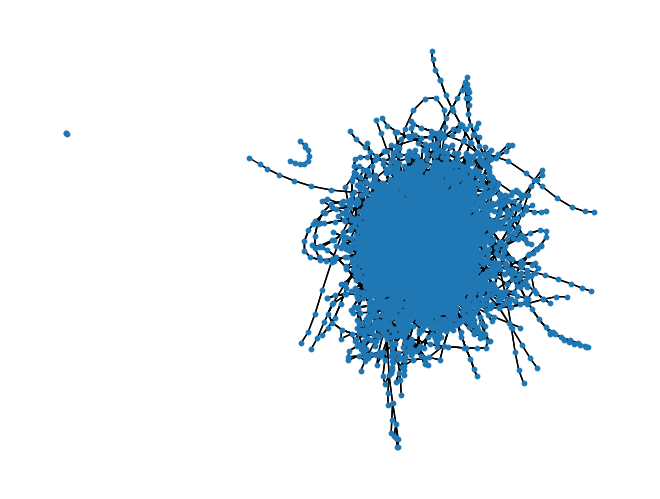

In [7]:
nx.draw(G,node_size=10)

In [6]:
degree1 = dict(G.degree)
for d in degree1.keys():
    if degree1[d] == max(degree1.values()):
        print(d)
        print("Maximum degree = " + str(max(degree1.values())))

TNA
Maximum degree = 1212


In [7]:
j = list(nx.connected_components(G))
for i in range(len(j)):
    print(len(j[i]))

8060
29
12
10
17
17
3


In [7]:
i = 1
for h in nx.connected_components(G):
    k = nx.subgraph(G,h)
    print("No of nodes in " + str(i) + "th subgraph are " + str(len(k.nodes)))
    degree1 = dict(k.degree)
    count1 = 0
    count2 = 0
    ap = list(nx.articulation_points(k))
    for d in degree1.keys():
        if degree1[d] == 1:
            count1 = count1 + 1
        if degree1[d] == 2:
            count2 = count2 + 1
    print("For " + str(i) + "th subgraph, nodes with  = " + str(count1) + " count2 = " + str(count2))
    print("No of AP = " + str(len(ap)))

No of nodes in 1th subgraph are 8060
For 1th subgraph, nodes with  = 2 count2 = 79
No of AP = 804
No of nodes in 1th subgraph are 29
For 1th subgraph, nodes with  = 0 count2 = 0
No of AP = 17
No of nodes in 1th subgraph are 12
For 1th subgraph, nodes with  = 0 count2 = 1
No of AP = 9
No of nodes in 1th subgraph are 10
For 1th subgraph, nodes with  = 0 count2 = 0
No of AP = 7
No of nodes in 1th subgraph are 17
For 1th subgraph, nodes with  = 0 count2 = 0
No of AP = 15
No of nodes in 1th subgraph are 17
For 1th subgraph, nodes with  = 0 count2 = 0
No of AP = 7
No of nodes in 1th subgraph are 3
For 1th subgraph, nodes with  = 0 count2 = 0
No of AP = 1


Text(0, 0.5, 'No of nodes')

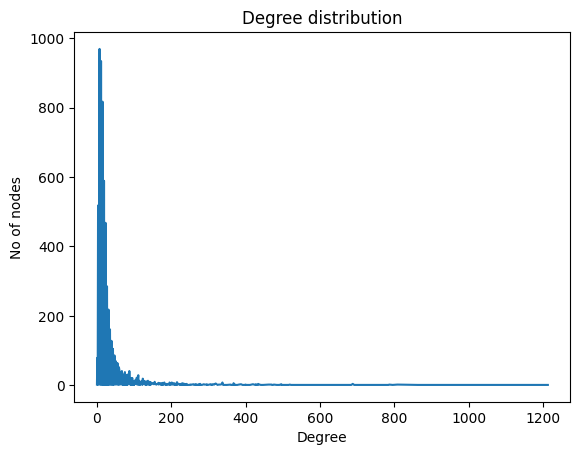

In [7]:
h = list(nx.connected_components(G))
G1 = nx.subgraph(G,h[0])
dict1 = dict(G1.degree())
dd = get_ddist(list(dict1.values()))
dds = dict(sorted(dd.items()))
plt.plot(dds.keys(),dds.values())
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('No of nodes')

In [8]:
ap = list(nx.articulation_points(G1))
print(len(ap))

804


In [38]:
count = 0
c7 = 0
nap = np.empty((len(ap),3),dtype='S5')
for a in ap:
    G2 = nx.MultiGraph(G1)
    G2.remove_node(a)
    h1 = list(nx.connected_components(G2))
    G21 = nx.subgraph(G2,h1[0])
    G22 = nx.subgraph(G2,h1[1])
    n1 = len(list(G21.nodes))
    n2 = len(list(G22.nodes))
    nap[count,0] = a
    nap[count,1] = str(n1)
    nap[count,2] = str(n2)
    count = count + 1
    
    if abs(n1 - n2) < 7000:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2)) 
        c7 = c7 + 1
    if abs(n1 - n2) < 7500 and count > 100 and c7 < 10:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2))
    if abs(n1 - n2) < 8000 and count > 200 and c7 < 10:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2))

Articulation point: MXN
The graph is split into 8006 53
Articulation point: DMV
The graph is split into 7980 79
Articulation point: DPU
The graph is split into 7975 84
Articulation point: LMG
The graph is split into 7971 88
Articulation point: GHY
The graph is split into 7837 222
Articulation point: RPAN
The graph is split into 8013 43
Articulation point: RNY
The graph is split into 7999 60
Articulation point: MALA
The graph is split into 8029 30
Articulation point: PBE
The graph is split into 8010 32
Articulation point: SSC
The graph is split into 8008 51
Articulation point: BJV
The graph is split into 8007 52
Articulation point: STH
The graph is split into 8006 53
Articulation point: BPR
The graph is split into 8004 55
Articulation point: RHA
The graph is split into 8026 33
Articulation point: BLN
The graph is split into 8009 50
Articulation point: NUPR
The graph is split into 8029 30
Articulation point: DLSR
The graph is split into 8027 32
Articulation point: PTK
The graph is split 

In [11]:
len(ap)

804

In [12]:
a

'PNQ'

In [13]:
ap[0]

'PNQ'

In [16]:
abs(-8)

8

In [32]:
n = np.empty((2,2),dtype = 'S3')

In [33]:
n[0,0] = 1

In [29]:
n

array([[ 1.  , -4.  ],
       [80.25, 14.  ]])

In [34]:
n[1,0] = 2
n

array([[b'1', b''],
       [b'2', b'']], dtype='|S3')

In [36]:
n[1,1] = 'HEL'
n

array([[b'1', b''],
       [b'2', b'HEL']], dtype='|S3')

In [39]:
len(nap)

804

In [40]:
nap

array([[b'PNQ', b'805', b'1'],
       [b'LOV', b'805', b'1'],
       [b'KXT', b'805', b'2'],
       ...,
       [b'CQA', b'805', b'7'],
       [b'VPZ', b'805', b'9'],
       [b'SRR', b'804', b'11']], dtype='|S3')

In [41]:
hnap = nap[:,1]

In [42]:
hnap

array([b'805', b'805', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'805', b'805', b'805', b'805', b'805', b'800', b'805',
       b'804', b'804', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'805', b'804', b'804', b'804', b'804', b'804', b'802',
       b'805', b'804', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'804', b'804', b'804', b'804', b'804', b'804', b'802',
       b'802', b'802', b'795', b'805', b'804', b'805', b'805', b'805',
       b'805', b'803', b'805', b'804', b'804', b'804', b'804', b'804',
       b'804', b'804', b'803', b'803', b'803', b'803', b'803', b'803',
       b'805', b'805', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'805', b'805', b'805', b'805', b'805', b'805', b'805',
       b'804', b'804', b'804', b'804', b'805', b'805', b'805', b'805',
       b'804', b'805', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'805', b'804', b'805', b'805', b'805', b'804', b'804',
      

In [43]:
min(hnap)

b'783'

In [44]:
lnap = nap[:,2]

In [45]:
max(lnap)

b'9'

In [46]:
lnap

array([b'1', b'1', b'2', b'3', b'4', b'5', b'6', b'1', b'2', b'3', b'4',
       b'5', b'1', b'1', b'10', b'4', b'11', b'2', b'1', b'2', b'3', b'4',
       b'5', b'6', b'1', b'2', b'10', b'15', b'16', b'17', b'18', b'19',
       b'1', b'2', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'11', b'12',
       b'13', b'14', b'15', b'16', b'37', b'38', b'39', b'105', b'5',
       b'10', b'1', b'2', b'3', b'4', b'1', b'5', b'10', b'11', b'12',
       b'14', b'15', b'18', b'19', b'20', b'23', b'24', b'25', b'26',
       b'27', b'1', b'2', b'2', b'3', b'4', b'5', b'6', b'1', b'2', b'3',
       b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'11', b'12', b'13',
       b'3', b'7', b'1', b'7', b'1', b'1', b'2', b'3', b'4', b'5', b'6',
       b'7', b'8', b'9', b'10', b'1', b'4', b'8', b'11', b'15', b'23',
       b'28', b'4', b'5', b'6', b'8', b'10', b'1', b'2', b'3', b'1', b'2',
       b'3', b'4', b'5', b'6', b'7', b'8', b'1', b'2', b'3', b'4', b'5',
       b'6', b'7', b'8', b'9', b'10', b'11', b'12', b'13

In [52]:
knap = np.empty(len(lnap))
ic = 0
for i in lnap:
    knap[ic] = int(i)
    ic = ic + 1

In [50]:
int(lnap[10])

4

In [53]:
max(knap)

222.0

In [54]:
nap

array([[b'PNQ', b'805', b'1'],
       [b'LOV', b'805', b'1'],
       [b'KXT', b'805', b'2'],
       ...,
       [b'CQA', b'805', b'7'],
       [b'VPZ', b'805', b'9'],
       [b'SRR', b'804', b'11']], dtype='|S3')

In [59]:
apdict = dict()
ni = 0
for ni in range(len(nap)):
    k = int(nap[ni,2])
    if k in apdict.keys():
        apdict[k] = apdict[k] + 1
    else:
        apdict[k] = 1

In [60]:
apdict

{1: 118,
 2: 98,
 3: 76,
 4: 66,
 5: 61,
 6: 54,
 10: 32,
 11: 25,
 15: 16,
 16: 12,
 17: 8,
 18: 7,
 19: 9,
 7: 48,
 12: 23,
 13: 17,
 14: 14,
 37: 1,
 38: 1,
 39: 2,
 105: 1,
 20: 4,
 23: 8,
 24: 3,
 25: 3,
 26: 3,
 27: 1,
 8: 34,
 9: 30,
 28: 2,
 53: 2,
 79: 1,
 84: 1,
 88: 1,
 21: 4,
 222: 1,
 43: 1,
 60: 1,
 22: 4,
 30: 2,
 32: 2,
 51: 1,
 52: 1,
 55: 1,
 33: 2,
 50: 1,
 29: 1}

In [61]:
dap = dict(sorted(apdict.items()))

In [62]:
dap

{1: 118,
 2: 98,
 3: 76,
 4: 66,
 5: 61,
 6: 54,
 7: 48,
 8: 34,
 9: 30,
 10: 32,
 11: 25,
 12: 23,
 13: 17,
 14: 14,
 15: 16,
 16: 12,
 17: 8,
 18: 7,
 19: 9,
 20: 4,
 21: 4,
 22: 4,
 23: 8,
 24: 3,
 25: 3,
 26: 3,
 27: 1,
 28: 2,
 29: 1,
 30: 2,
 32: 2,
 33: 2,
 37: 1,
 38: 1,
 39: 2,
 43: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 2,
 55: 1,
 60: 1,
 79: 1,
 84: 1,
 88: 1,
 105: 1,
 222: 1}

Text(0, 0.5, 'No of Articulation points')

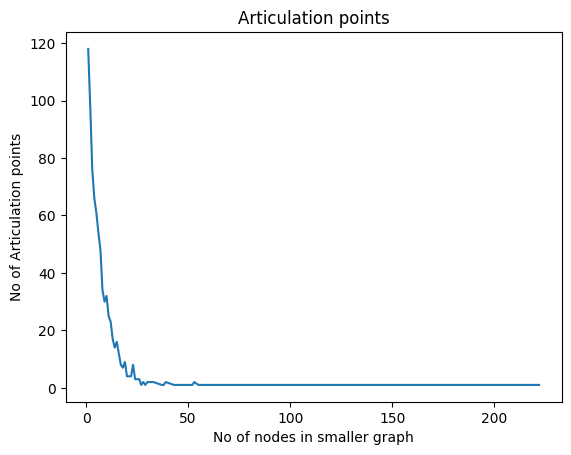

In [67]:
plt.plot(dap.keys(),dap.values())
plt.title('Articulation points')
plt.xlabel('No of nodes in smaller graph')
plt.ylabel('No of Articulation points')

In [65]:
for i in range(len(nap)):
    if nap[i,2] == b'222':
        print(nap[i,0])

b'GHY'


In [66]:
sum(dap.values())

804